In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
# Matplotlib creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
# The statsmodels.graphics.regressionplots module provides the influence_plot function, which is used to create an influence plot for examining the influential data points in a regression analysis.
# statsmodels. formula. api : A convenience interface for specifying models using formula strings and DataFrames.
# The sklearn.linear_model module in Python's scikit-learn library provides tools for modeling linear regression, ridge regression, Lasso regression, and other linear models.
# The sklearn.metrics import r2_score is a function that calculates the R-squared score of a regression model
# NumPy is a Python library used for working with arrays
# import warnings statement in Python is used to control how warning messages are displayed


In [3]:
start = pd.read_csv("50_Startups.csv")
start

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

<AxesSubplot:>

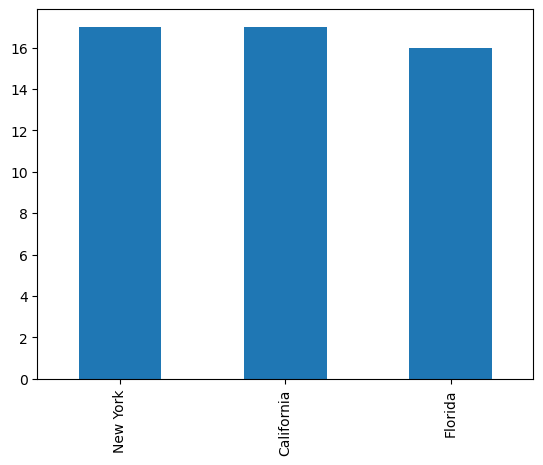

In [4]:
start['State'].value_counts().plot.bar()
# A bar plot is a kind of graph or chart that is mainly used to represent categorical data with rectangular bars 

In [5]:
startup = start.drop('State',axis = 1)
startup.head(7)

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94
5  131876.90        99814.71        362861.36  156991.12
6  134615.46       147198.87        127716.82  156122.51

In [6]:
startup.isnull().sum()
# isnull().sum is used to find the number of null values in dataframe

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [7]:
startup.info()
# Display or print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
startup.describe()
# Display descriptive statistics summary of a given dataframe


R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [9]:
startup.isna().sum()
# The isna().sum() function in Pandas is used to count the number of NaN (Not a Number) values in a DataFrame

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [10]:
startup.corr()
# The corr() function in Pandas is used to calculate the correlation coefficient between two or more columns in a DataFrame.

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

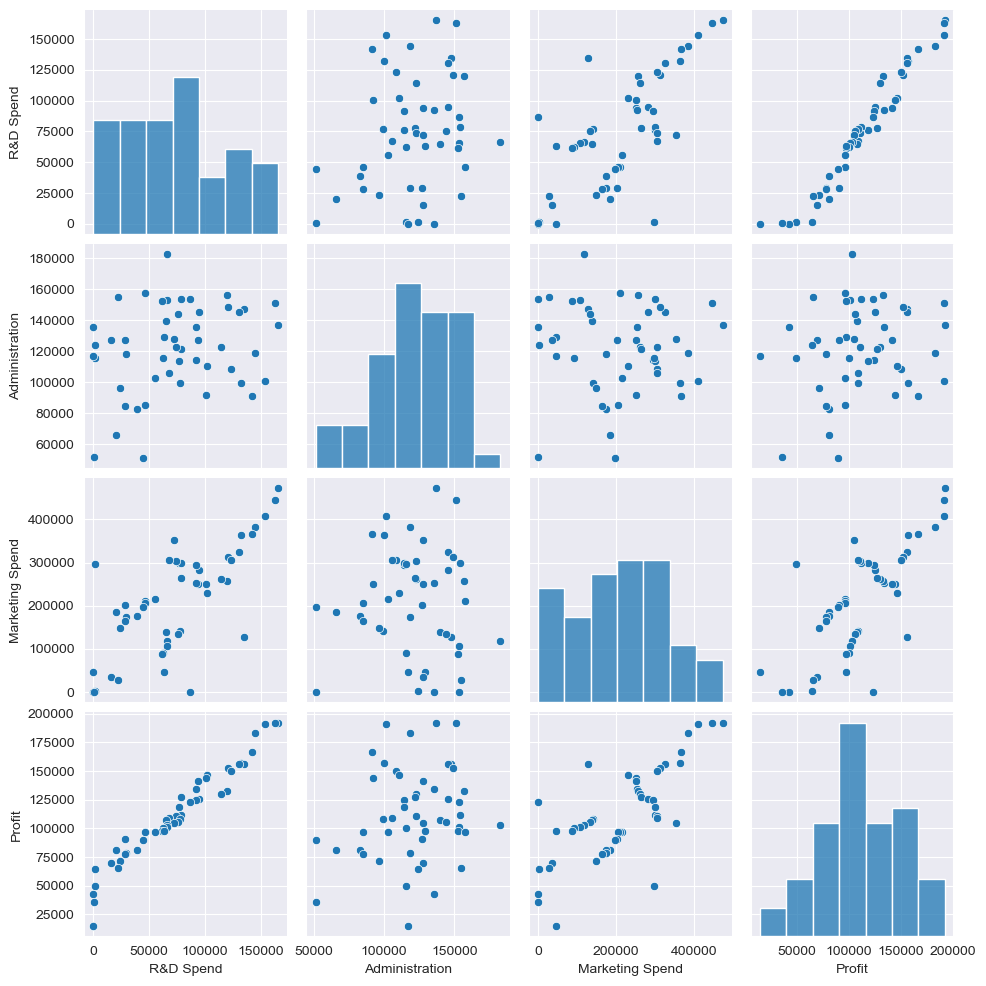

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [12]:
#R&D Spend appears to be the strongest predictor of Profit among the numerical variables.
#There's no strong indication of multicollinearity (high correlation) between these numerical variables, which is good for building predictive models.
#Startups that invest significantly in both R&D and Marketing tend to have higher profits, but this isn't a rule; there are exceptions.
#Administration Spend doesn't show a consistent trend in relation to Profit, suggesting that other factors might influence profitability more significantly.


<AxesSubplot:>

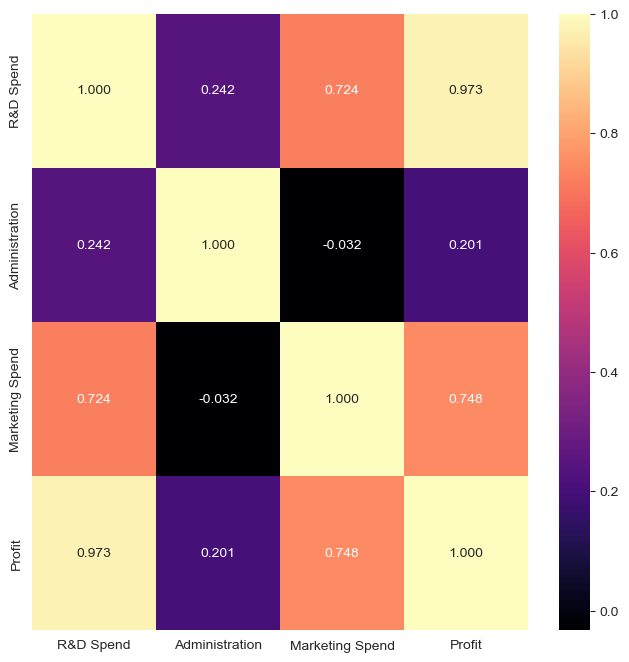

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(startup.corr(),cmap='magma',annot=True, fmt=".3f")

In [14]:
#R&D Spend is strongly correlated with Profit, indicating that investments in research and development tend to yield higher profits.
#Marketing Spend also has a positive correlation with Profit, though it's not as strong as R&D Spend's correlation.
#Administration Spend shows a relatively weak correlation with Profit, suggesting that it might have a limited impact on profitability.


<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

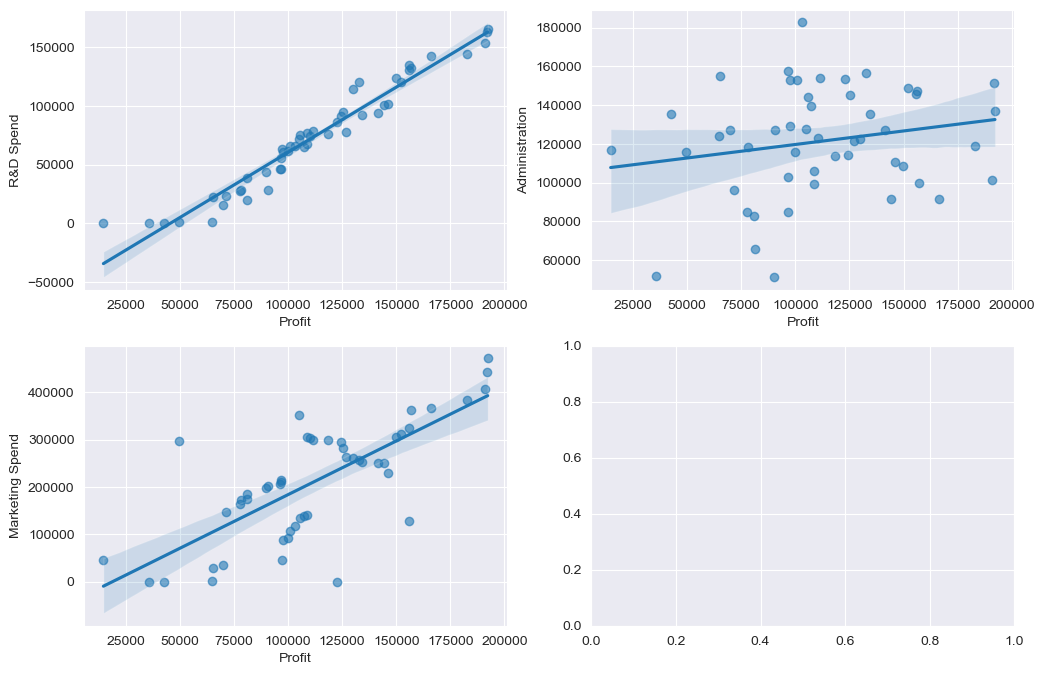

In [15]:
f, axes = plt.subplots(2,2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'R&D Spend',data =startup, scatter_kws={'alpha':0.6},ax =axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration',data =startup, scatter_kws={'alpha':0.6},ax =axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend',data =startup, scatter_kws={'alpha':0.6},ax =axes[1,0])

In [16]:
#R&D Spend and Marketing Spend exhibit positive linear relationships with Profit, indicating that increasing these expenditures tends to lead to higher profits.
#Administration Spend doesn't seem to have a strong linear relationship with Profit based on these plots. Other factors might play a more significant role in determining profitability.
#The scatter plots suggest that while there are correlations between these predictor variables and Profit, there's also considerable variability in Profit for different levels of spending.


# Model Building


# Using Sklearn


In [17]:
X = startup.drop(['Profit'], axis =1).values
y = startup.iloc[:,3].values.reshape(-1,1)
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [18]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
model.rank_
# RANK gives duplicate numbers the same rank


3

In [20]:
model.coef_
# the coef_ attribute returns an array of the coefficients of the linear regression equation.

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [21]:
model.intercept_
# The model.intercept_ attribute in Python is used to access the intercept of a fitted model


array([50122.19298987])

In [22]:
r2_score(y,model.predict(X))

0.9507459940683246

# Prediction

In [23]:
startup_new = pd.DataFrame({"R&D Spend":152200,"Administration":155300,"Marketing Spend":472000},index=[1])
model.predict(startup_new)
print("The profit will be:",model.predict(startup_new))

The profit will be: [[181439.15028132]]


# Using stats.ols


In [24]:
d1=startup.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startups=d1.rename({'R&D Spend':'RandD_Spend'},axis=1)
startups.head(2)

RandD_Spend  Administration  Marketing_Spend     Profit
0     165349.2       136897.80        471784.10  192261.83
1     162597.7       151377.59        443898.53  191792.06

In [25]:
module = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = startups).fit()
module.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        22:51:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test for Normality of Residuals (Q-Q Plot)


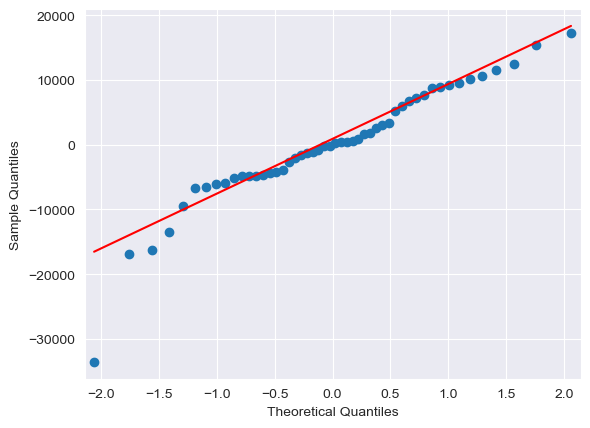

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(module.resid,line='q') # line = 45 to draw the diagnoal line


In [27]:
#The QQ plot is a useful tool for checking the normality assumption of residuals in a model.
#If the residuals follow the diagonal line closely, it indicates that the model's residuals are normally distributed, which is important for accurate statistical inference.
#Deviations from the diagonal line could suggest that the model might not fully meet the normality assumption. Investigating and addressing such deviations may lead to improved model accuracy and reliability.


# Residual Plot for Homoscedasticity


In [28]:
import statsmodels.api as sm

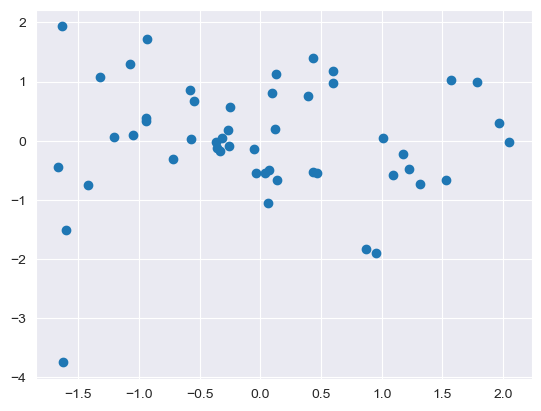

In [29]:
def std(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(std(module.fittedvalues),std(module.resid))

In [30]:
#The scatter plot of standardized residuals against standardized predicted values can provide insights into the assumptions and potential issues of a model.
#A roughly constant spread of points across the range of predicted values suggests that the model's assumptions are met.
#Patterns or trends in the scatter plot might indicate issues that need further investigation, such as nonlinearity or heteroscedasticity.


# Residual Vs Regressors


eval_env: 1


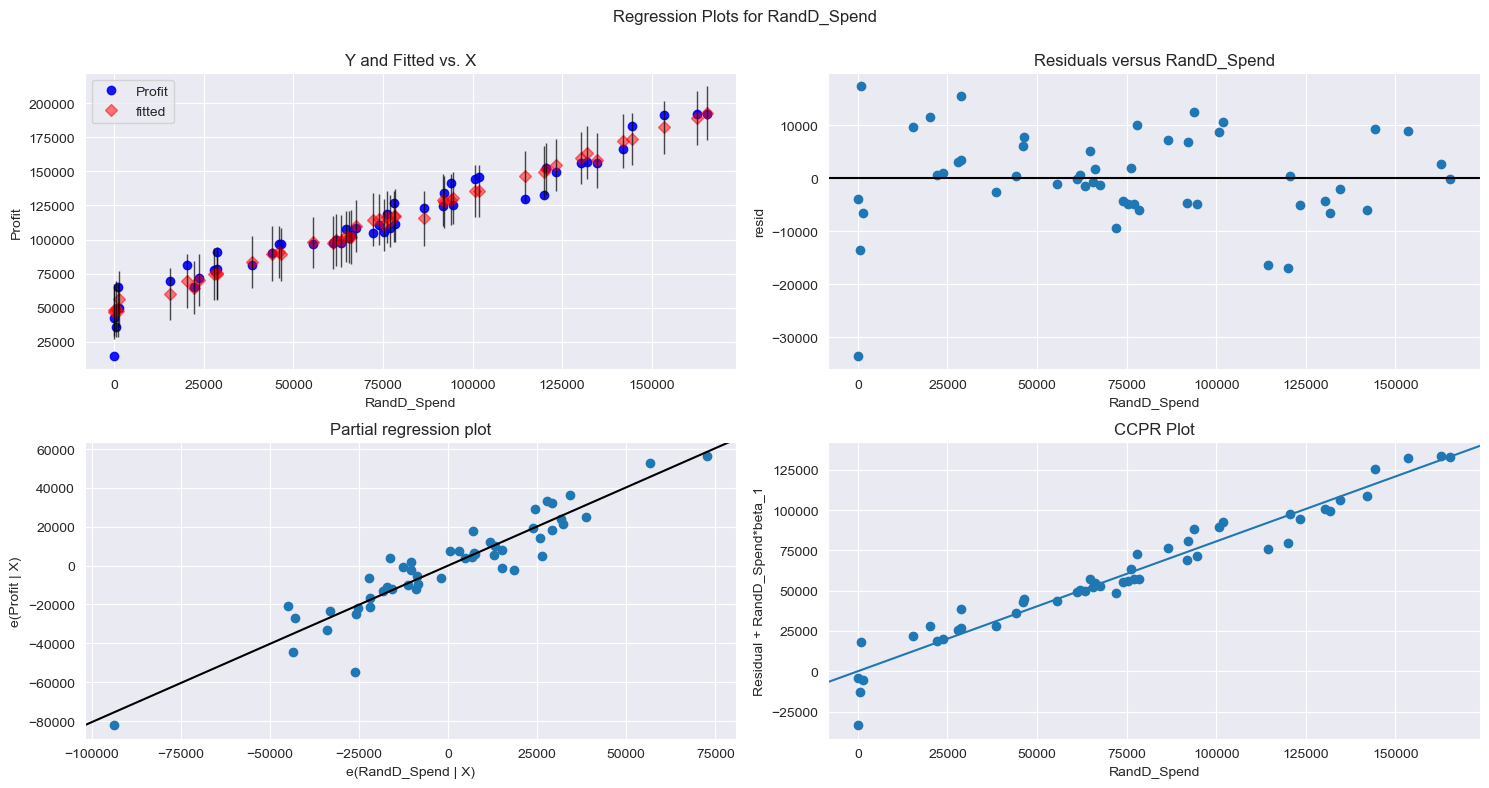

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module,"RandD_Spend",fig=fig)
plt.show()

In [32]:

#The diagnostic plots provide a comprehensive view of the relationship between the predictor variable ("RandD_Spend") and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are being met.
#Nonlinear patterns, outliers, or distinct trends in any of these plots may indicate issues that require further investigation and model refinement.


eval_env: 1


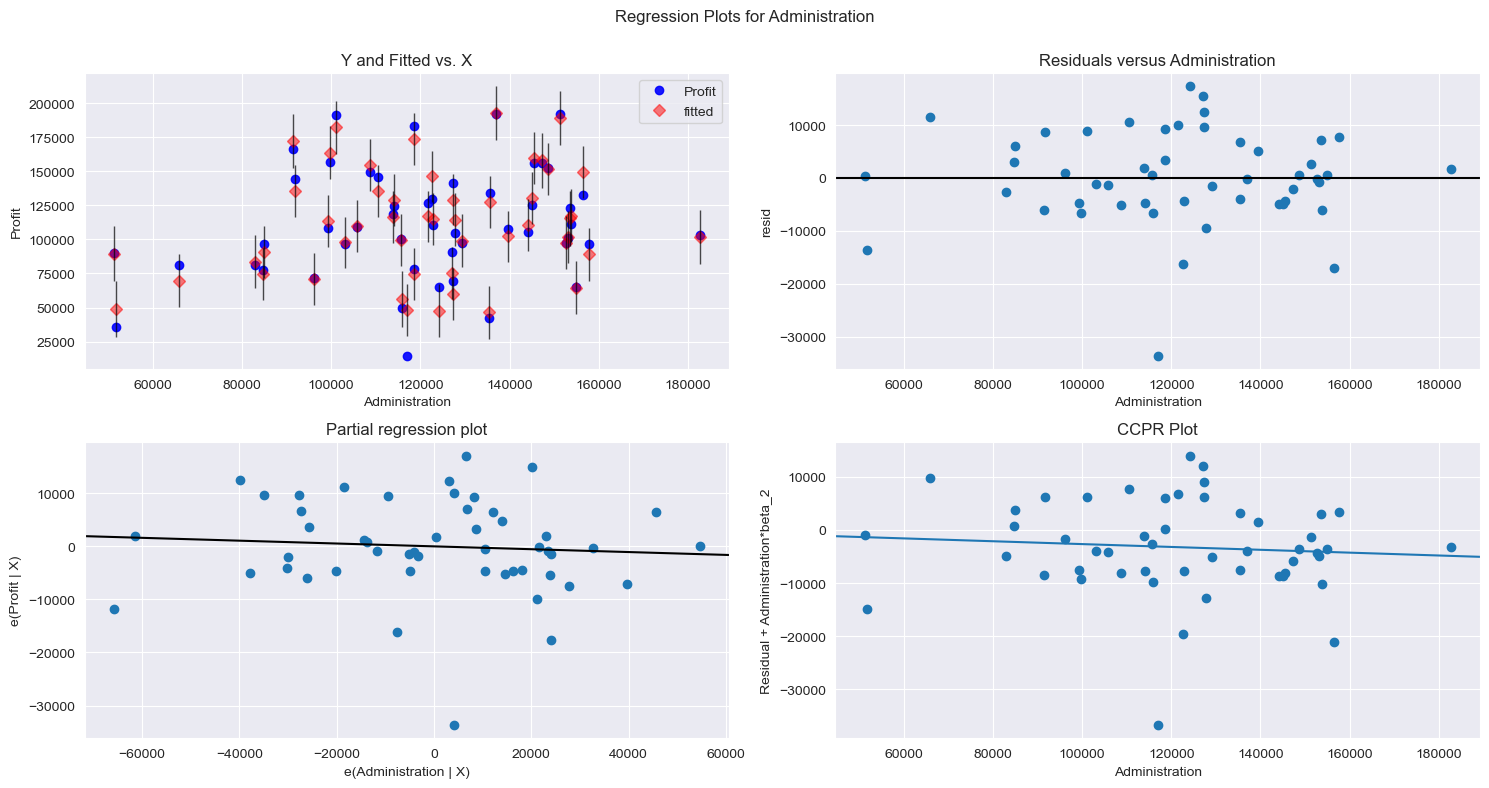

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module,"Administration",fig=fig)
plt.show()

In [34]:
#The diagnostic plots provide a comprehensive view of the relationship between the predictor variable ("Administration") and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are being met.
#Nonlinear patterns, outliers, or distinct trends in any of these plots may indicate issues that require further investigation and model refinement.


eval_env: 1


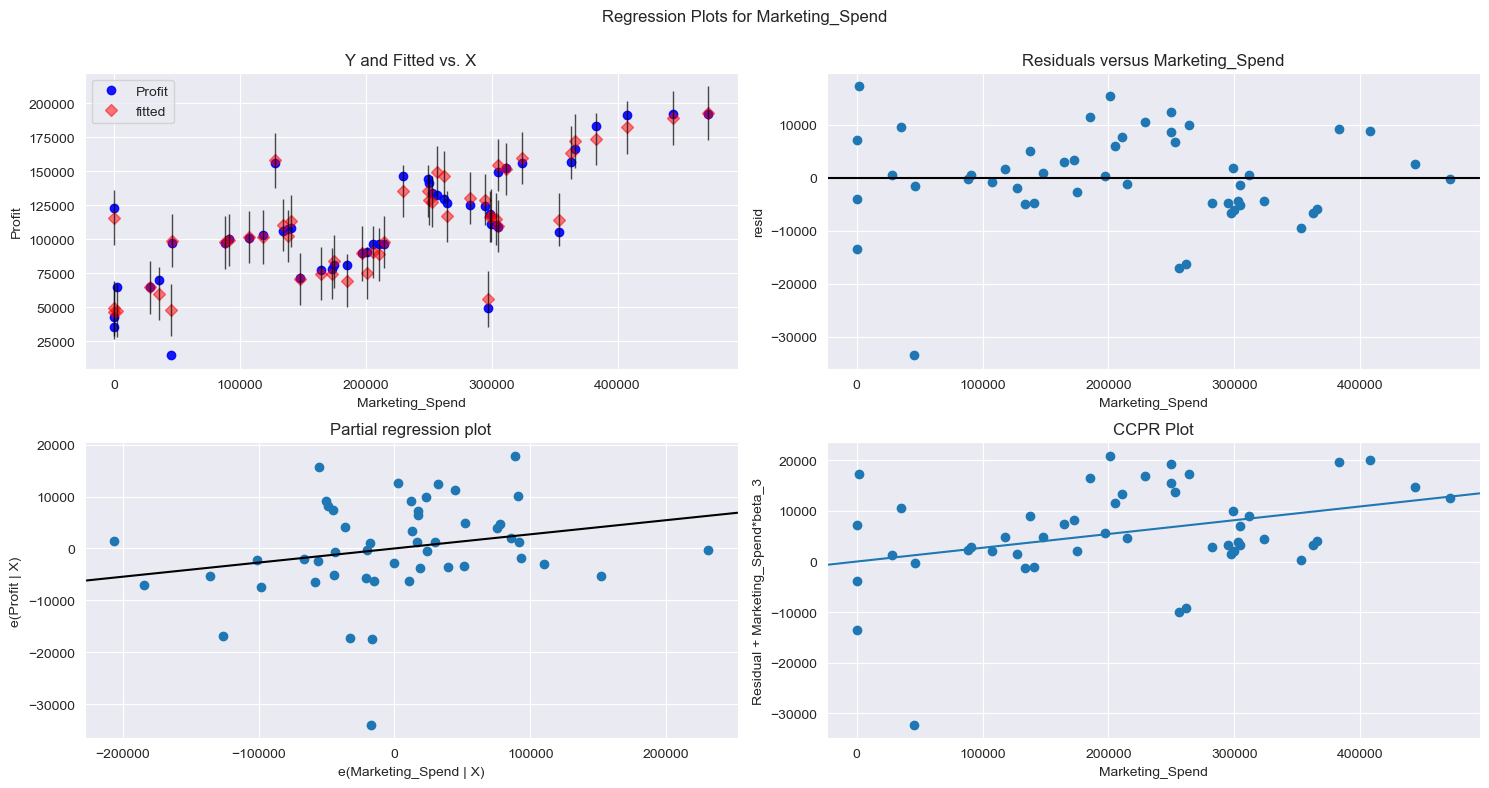

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module,"Marketing_Spend",fig=fig)
plt.show()

In [36]:
#The diagnostic plots provide a comprehensive view of the relationship between the predictor variable ("Marketing_Spend") and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are being met.
#Nonlinear patterns, outliers, or distinct trends in any of these plots may indicate issues that require further investigation and model refinement.


# Model Deletion Diagnostics


# Detecting Influencers/Outliers


In [37]:
# the get_influence method of the statsmodel package generates a table with influence diagnostics that we can use to determine these influential points

In [38]:
module_influence = module.get_influence()
(c, _) = module_influence.cooks_distance


In [39]:
# Cook's distance is a statistical measurement that estimates the influence of a data point when performing a least squares regression analysis

In [40]:
#An influence plot is a regression diagnostic tool that shows the influence, leverage, and outlyingness of each case

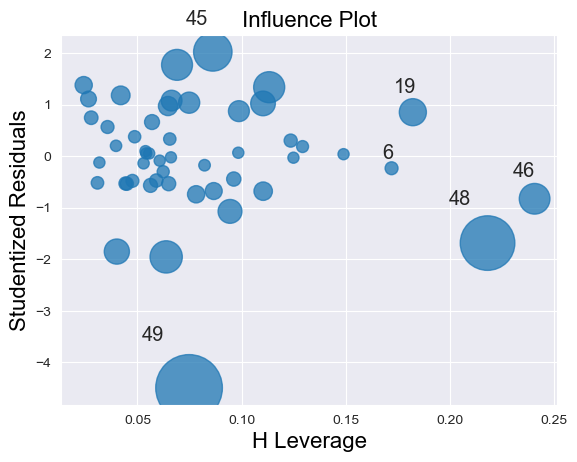

In [41]:
influence_plot(module)
plt.show()

In [42]:
#The influence plot helps to identify influential data points that might have a significant impact on the regression model.
#Points with both high leverage and large Cook's distances are of particular interest, as they could affect the model's performance and generalization.


In [43]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [45]:
(module.rsquared,module.aic)


(0.9507459940683246, 1058.7714985998055)

In [46]:
# In model selection, AIC is used to compare the goodness of fit of different models, while R-squared is used to evaluate the overall fit of a single model. A lower AIC value indicates a better-fitting model, while a higher R-squared value indicates a better fit of the data to the model

In [47]:
module.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [48]:
import plotly.express as px

# scatter plot of R&D Spend vs Profit colored by State ans sized by Marketing Spend

scatter_fig = px.scatter(start, x='R&D Spend', y='Profit', color='State', size='Marketing Spend',title='R&D Spend vs Profit (colored by State, Sized by Marketing Spend)')
scatter_fig.show()

# Box plot of profit for each State
box_fig = px.box(start,x='State', y='Profit', title ='Profit Distribution by State')
box_fig.show()

In [49]:
#Scatter Plot of R&D Spend vs Profit (Colored by State, Sized by Marketing Spend):

#The scatter plot reveals that there's a positive trend between R&D spending and profit. Generally, as R&D spending increases, profits tend to increase as well.
#The points are colored by state, showing the distribution of startups across different states. California has the highest number of startups, followed by New York and Florida.
#The size of the points represents the marketing spend. It seems that startups with higher marketing spend also tend to have higher profits.

#Box Plot of Profit for Each State:

#The box plot gives us insights into the distribution of profits across different states.
#California has the widest interquartile range (IQR) and the highest median profit, indicating that startups in California generally exhibit higher profit variability and potential.


In [51]:
from bokeh.models import HoverTool , ColumnDataSource
from bokeh.plotting import figure, show


# Scatter plot of R&D Spend vs Profit with interactive tooltips using Bokeh
hover = HoverTool(tooltips=[('State', '@State'), ('R&D Spend', '@{R&D Spend}'), ('Profit', '@Profit')])
scatter_bokeh = figure(title='R&D Spend vs Profit', x_axis_label='R&D Spend', y_axis_label='Profit', tools=[hover])
scatter_bokeh.circle('R&D Spend', 'Profit', source=start, size='Marketing Spend', color='State', legend_field='State')
scatter_bokeh.legend.title = 'State'
show(scatter_bokeh)

# Grouped bar plot of Profit and Marketing Spend by State using Bokeh
grouped_bar = figure(x_range=start['State'].unique(), title='Profit and Marketing Spend by State')
grouped_bar.vbar(x='State', top='Profit', source=start, color='blue', legend_label='Profit')
grouped_bar.vbar(x='State', top='Marketing Spend', source=start, color='orange', legend_label='Marketing Spend')
grouped_bar.legend.title = 'Metrics'
show(grouped_bar)


In [52]:
#Interactive Scatter Plot of R&D Spend vs Profit (Colored by State, Sized by Marketing Spend):

#Hovering over the points provides specific information about the state, R&D spend, and profit, allowing for detailed exploration of individual data points.
#The larger-sized points represent higher marketing spend. Startups with larger marketing spend tend to have higher profits in some cases.

#Grouped Bar Plot of Profit and Marketing Spend by State:

#The grouped bar plot provides a clear visual comparison of the profit and marketing spend across different states.
#Startups in California have the highest profit, followed by New York and Florida. This aligns with the earlier observation from the box plot.
#While California also leads in marketing spend, it's interesting to note that New York has a relatively high marketing spend compared to Florida.


# Q.NO.2


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
# Matplotlib creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
# The statsmodels.graphics.regressionplots module provides the influence_plot function, which is used to create an influence plot for examining the influential data points in a regression analysis.
# statsmodels. formula. api : A convenience interface for specifying models using formula strings and DataFrames.
# NumPy is a Python library used for working with arrays
# import warnings statement in Python is used to control how warning messages are displayed


In [55]:
toyota =  pd.read_csv("ToyotaCorolla.csv",encoding='iso-8859-1')
toyota

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [58]:
car = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
car

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [59]:
car.info()
# Display or print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [60]:
car.isna().sum()
# To count the number of NaN values in a specific column in a Pandas DataFrame

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [62]:
car.corr()
# CORR returns the coefficient of correlation of a set of number pairs.

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

In [63]:
car.describe()
# Display descriptive statistics summary of a given dataframe


Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

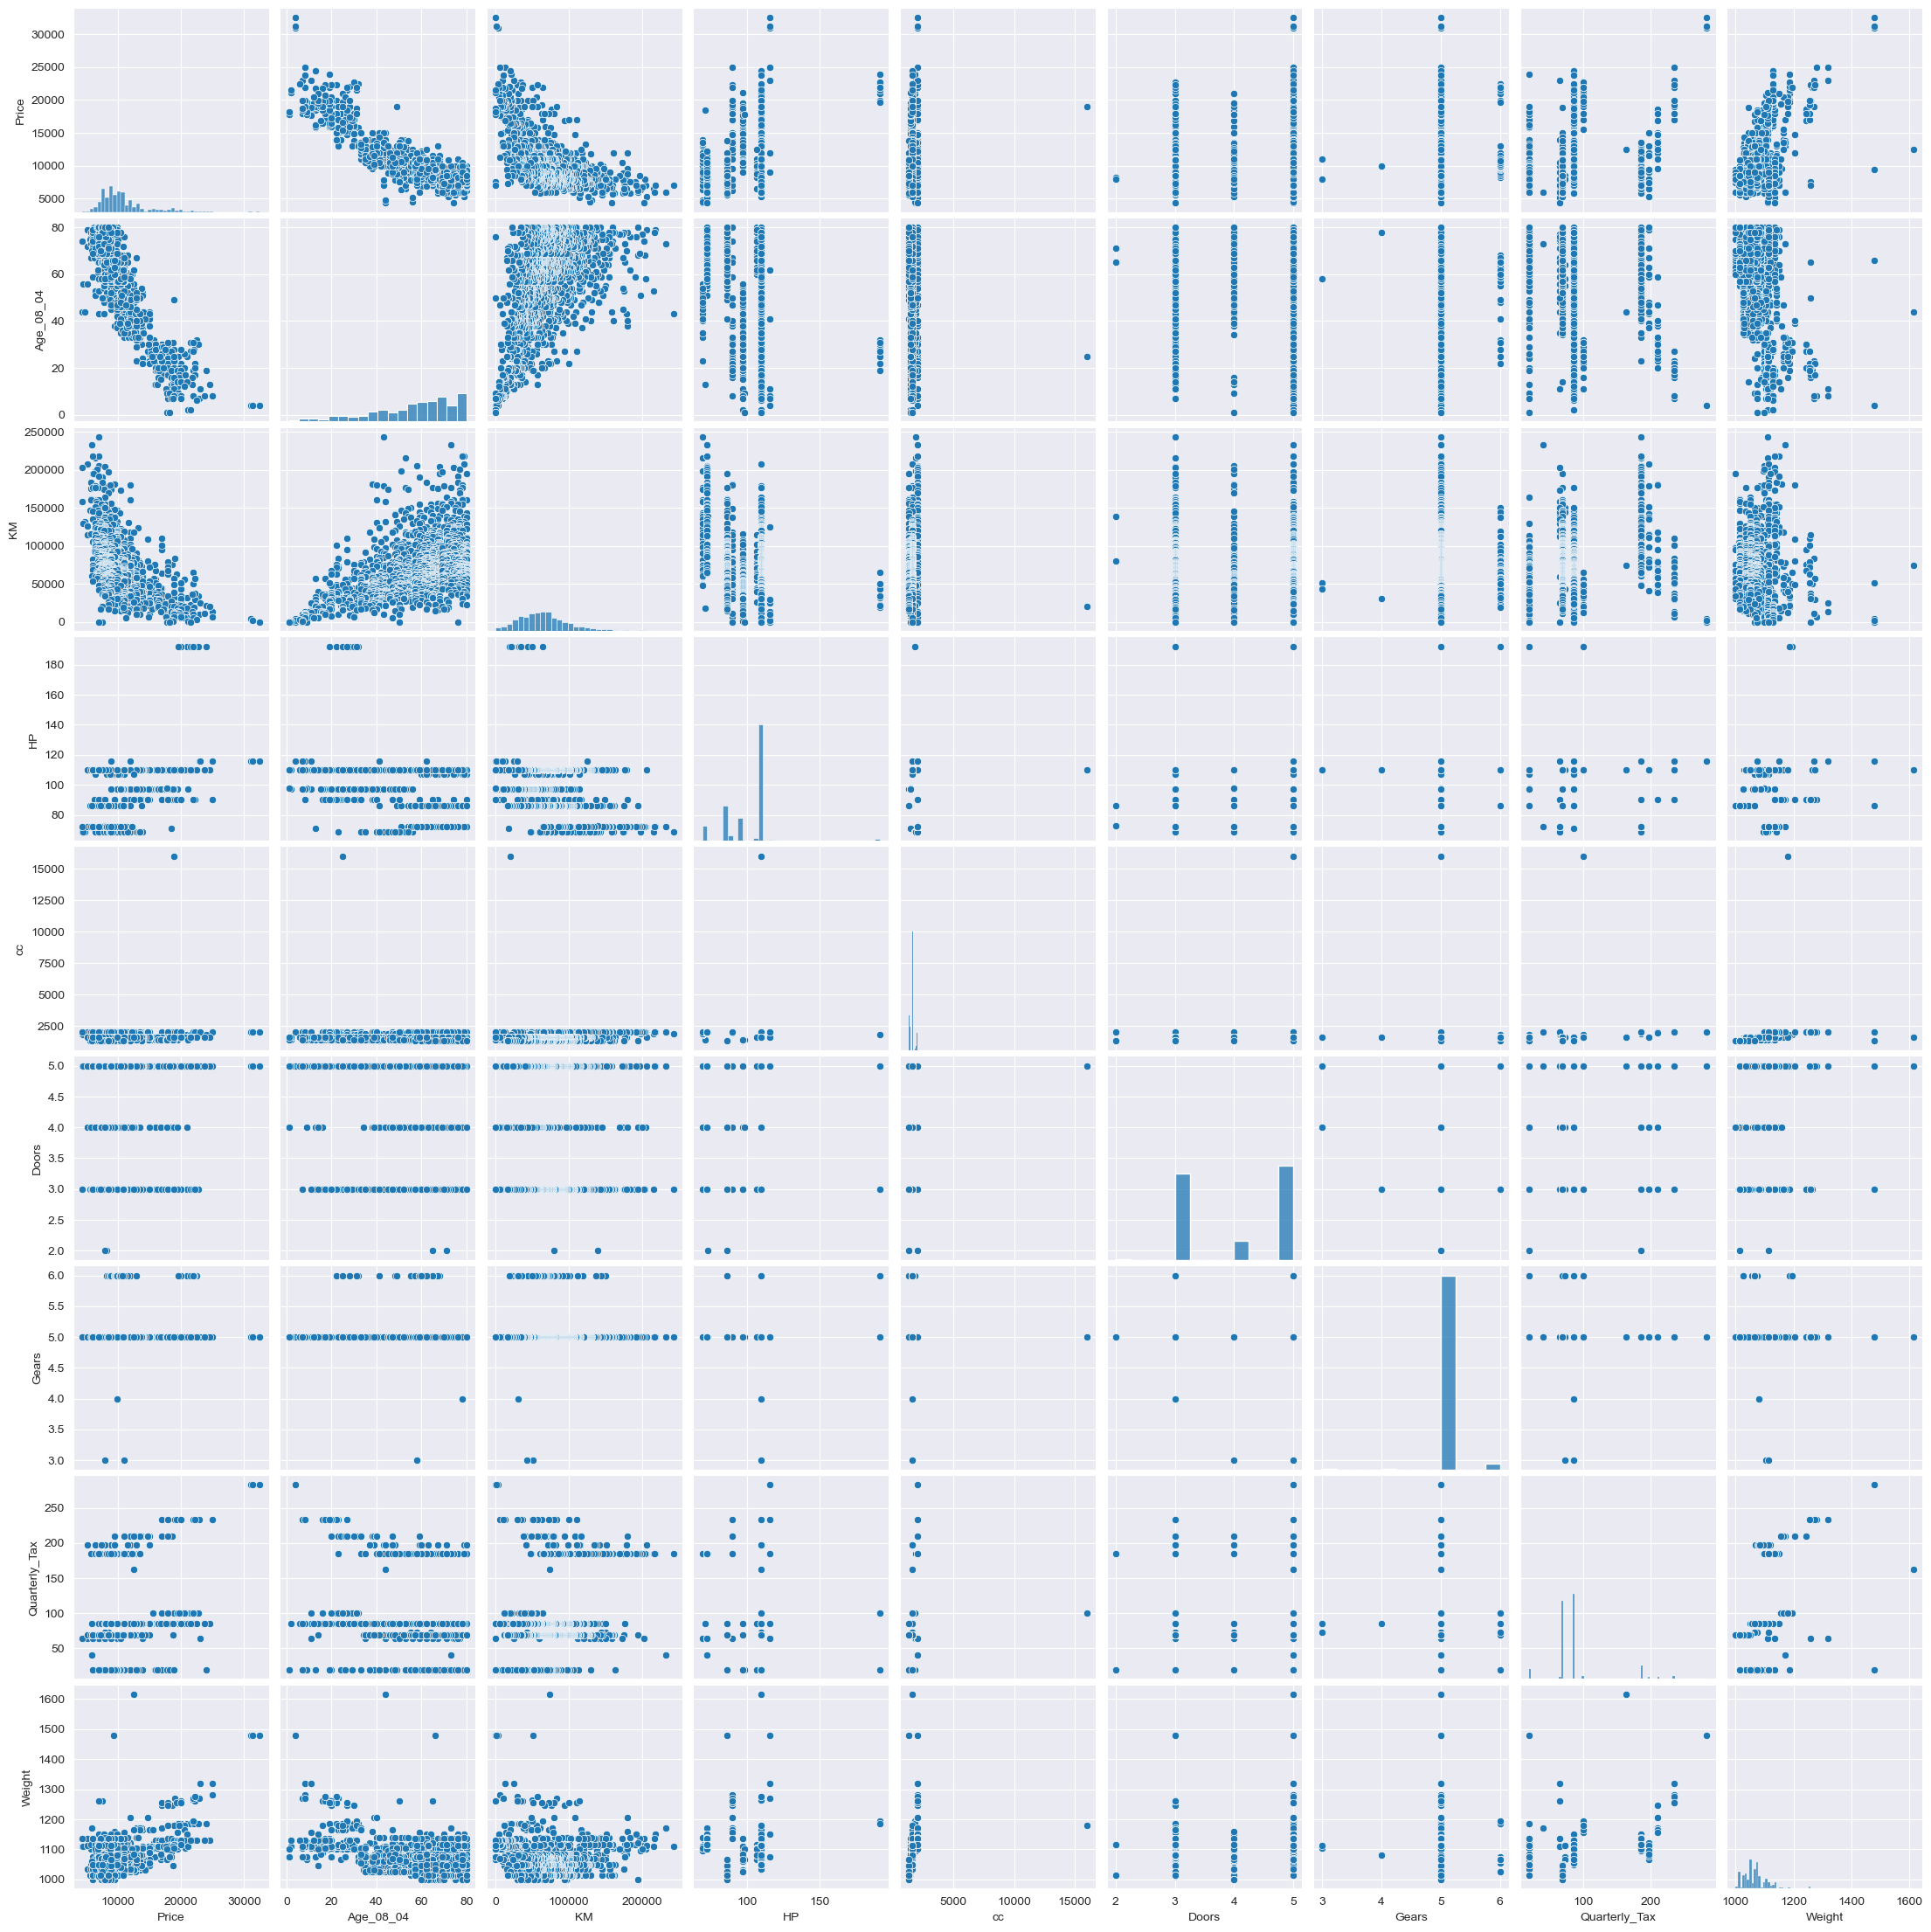

In [64]:
sns.set_style(style='darkgrid')
sns.pairplot(car)

In [65]:
#The pair plot provides a visual overview of relationships between pairs of variables in the dataset.
#It's clear that "Price" is influenced by "Age" and "Kilometers," as older cars with higher mileage tend to be priced lower.
#The other relationships might not be as straightforward and may require further analysis or modeling to understand better.


<AxesSubplot:>

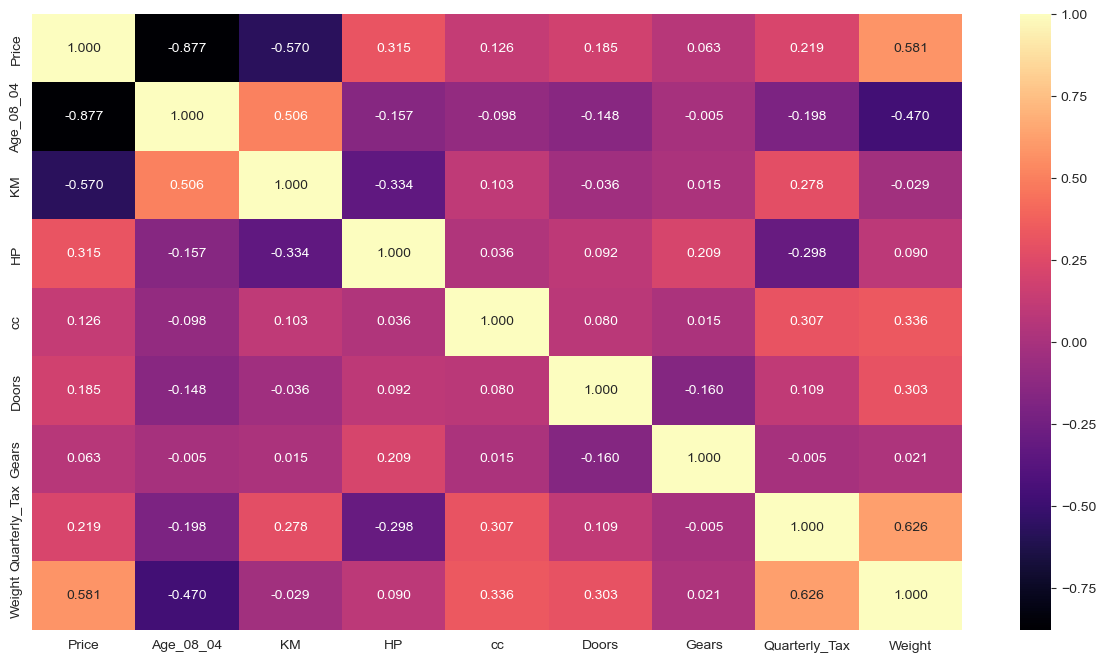

In [66]:
fig, ax=plt.subplots(figsize=(15,8))
sns.heatmap(car.corr(),cmap='magma',annot=True,fmt=".3f")
# Heatmaps are graphical representations of data that use color-coded systems to help users see the intensities of certain phenomena.

In [67]:
#The heatmap provides insights into the relationships between variables in the dataset, helping us understand how they are interrelated.
#The strongest correlations are observed between "Price" and "Age," "HP," and "Weight." These variables play a significant role in determining car prices.
#"Kilometers" is positively correlated with "Age," which is intuitive since older cars tend to have higher mileage.
#The heatmap is a valuable tool to identify which variables are likely to be important predictors of certain outcomes and can guide further analysis and modeling efforts.


# Graphs

<AxesSubplot:xlabel='Price', ylabel='HP'>

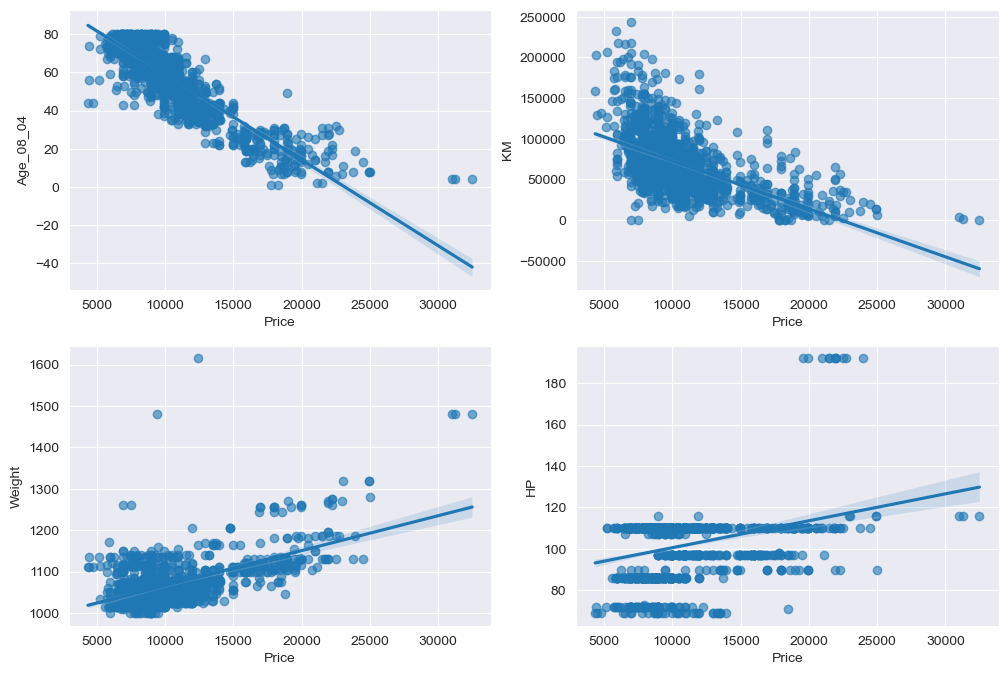

In [68]:
f, axes = plt.subplots(2,2,figsize=(12,8))

sns.regplot(x = 'Price', y ='Age_08_04',data = car, scatter_kws={'alpha':0.6},ax = axes[0,0])
sns.regplot(x = 'Price', y ='KM',data = car, scatter_kws={'alpha':0.6},ax = axes[0,1])
sns.regplot(x = 'Price', y ='Weight', data =car, scatter_kws={'alpha':0.6},ax = axes[1,0])
sns.regplot(x = 'Price', y ='HP', data = car,scatter_kws={'alpha':0.6},ax= axes[1,1])


In [69]:
#The scatter plots with regression lines provide insights into how the predictor variables are related to the target variable ("Price").
#Age, weight, and horsepower appear to have noticeable correlations with the price of the cars.
#Kilometers (mileage) alone might not be a strong predictor of price, as its relationship with price seems less linear.
#While these insights provide a general understanding of the relationships, it's important to consider multicollinearity and other factors when building predictive models.


<AxesSubplot:xlabel='Price', ylabel='KM'>

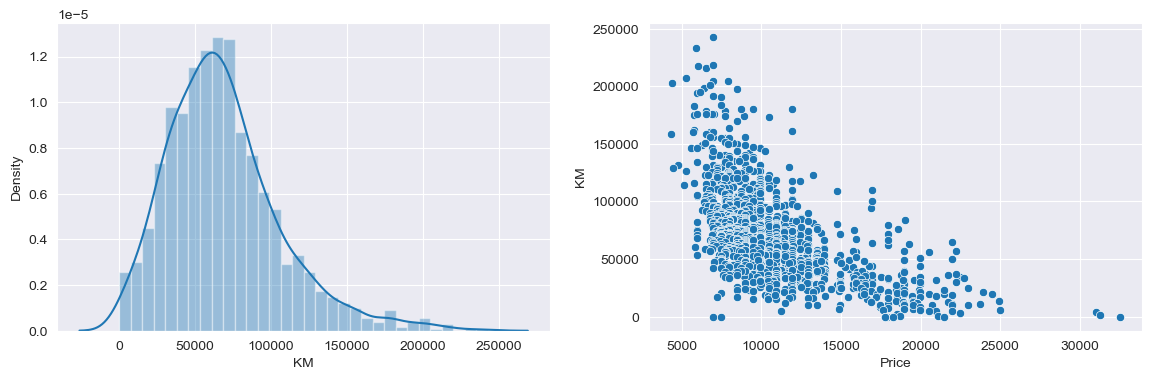

In [71]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(car['KM'], ax = axes[0])
sns.scatterplot(x = 'Price' , y = 'KM' ,data = car, ax = axes[1])


<AxesSubplot:xlabel='Gears', ylabel='Price'>

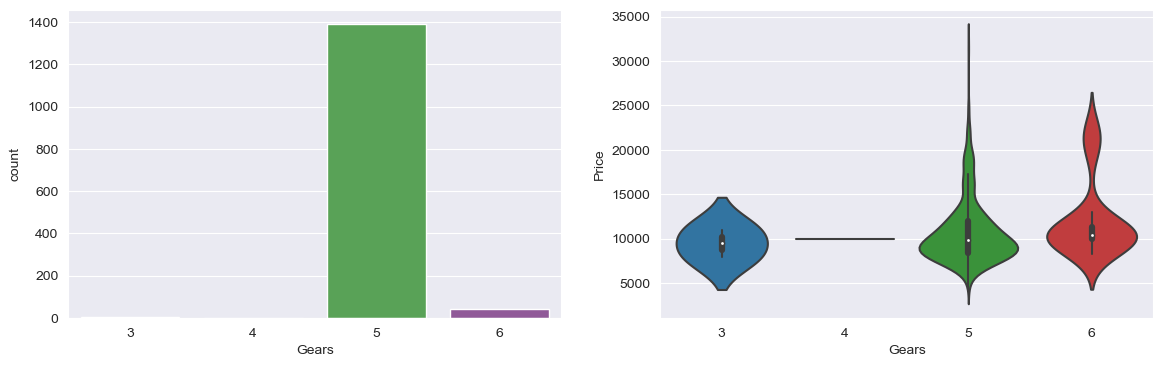

In [75]:
from collections import Counter
fuel_list = Counter(car['Gears'])

f, axes = plt.subplots(1,2,figsize=(14,4))
sns.countplot(car['Gears'], ax = axes[0] , palette="Set1")
sns.violinplot(x = 'Gears', y = 'Price', data = car,ax = axes[1])



<AxesSubplot:xlabel='HP', ylabel='Price'>

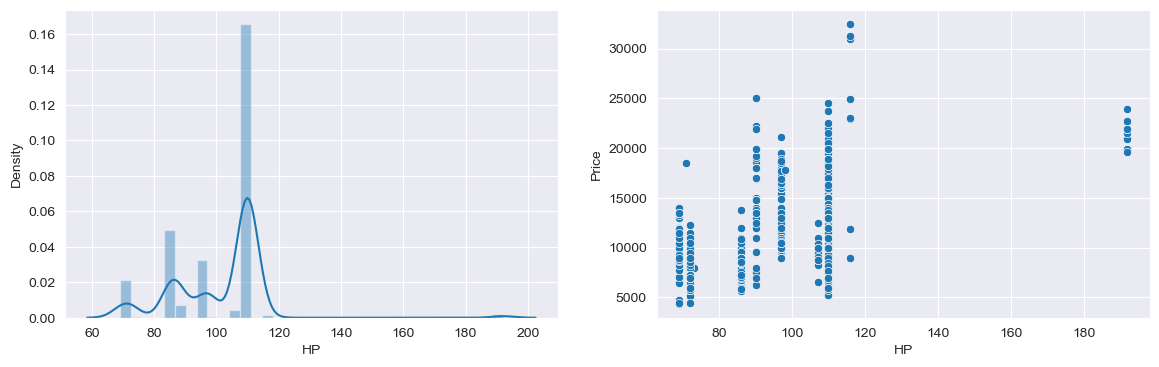

In [80]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(car['HP'], ax = axes[0])
sns.scatterplot(x = 'HP', y = 'Price',data = car, ax = axes[1])

In [ ]:
#f, axes = plt.subplots(1,2,figsize=(14,4))

#sns.distplot(car['Doors'], ax = axes[0])
#sns.boxenplot(x = 'Doors', y = 'Price', data = car, ax = axes[1])


<AxesSubplot:xlabel='Doors', ylabel='Price'>

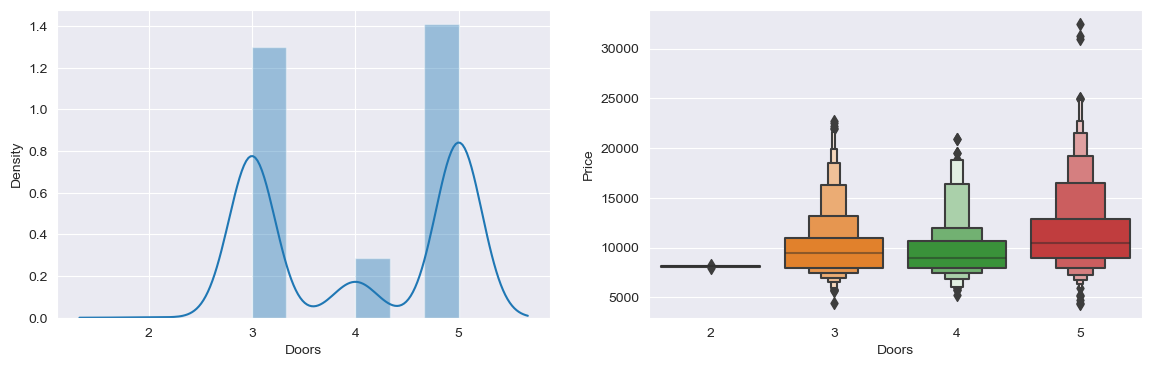

In [81]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(car['Doors'], ax =axes[0])
sns.boxenplot(x='Doors',y= 'Price',data =car, ax =axes[1])

# Pandas Profiling & Sweetviz


In [82]:
#Pandas Profiling and Sweetviz are both open-source Python libraries that automate the exploratory data analysis (EDA) process. They both generate interactive HTML reports that provide detailed visualizations and summaries of the data, making it easy to identify patterns, outliers, and missing values.


In [87]:
pip install pandas-profiling



     -------------------------------------- 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ------------------------------------- 357.8/357.8 kB 21.7 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 102.7/102.7 kB 6.2 MB/s eta 0:00:00
     ------------------------------------- 381.9/381.9 kB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 11.6 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 12.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=d78c3dfdea8ac

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [92]:
#import pandas_profiling as pp
#import sweetviz as sv
#sweet_report = sv.analyze(car)
#sweet_report.show_html('Toyota_Report.html')


In [93]:
#EDA= pp.ProfileReport(car)
#EDA.to_file(output_file='Toyoto Corolla.html')


# Model Building


# Using Sklearn


In [94]:
X = car.drop('Price', axis = 1).values
y = car.iloc[:,0].values.reshape(-1,1)
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [95]:
y


array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [97]:
# Splitting the dataset into the Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state = 42)

In [98]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077, 1)
Shape of y_test: (359, 1)


In [99]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7719638138218412
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605137
RMSE:  1402.0810748973884


In [101]:
regressor_linear.rank_


8

In [102]:
regressor_linear.coef_


array([[-1.21320641e+02, -2.01353093e-02,  2.95093022e+01,
        -7.75554068e-02,  2.06641923e+01,  5.83104153e+02,
         1.83035074e+00,  1.78505581e+01]])

In [103]:
regressor_linear.intercept_


array([-6263.01172068])

In [104]:
#Price prediction
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
regressor_linear.predict(car_new)
print("The price will be:",regressor_linear.predict(car_new))

The price will be: [[16029.16408435]]


# Using stats.ols


In [105]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:13:46   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF


In [107]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_age = 1/(1-rsq_age) # 1.88

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_km = 1/(1-rsq_km) #  1.76

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  1.42

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 1.16

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_doors = 1/(1-rsq_doors) #  1.16

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_gears = 1/(1-rsq_gears) #  1.1

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=car).fit().rsquared  
vif_tax = 1/(1-rsq_tax) #  2.31

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=car).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  2.52

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


Variables       VIF
0            Age  1.884620
1             KM  1.756905
2             HP  1.419422
3             cc  1.163894
4          Doors  1.156575
5          Gears  1.098723
6  Quarterly_Tax  2.311431
7         Weight  2.516420

# Residual Analysis


In [109]:
# Test for Normality of Residuals (Q-Q Plot)


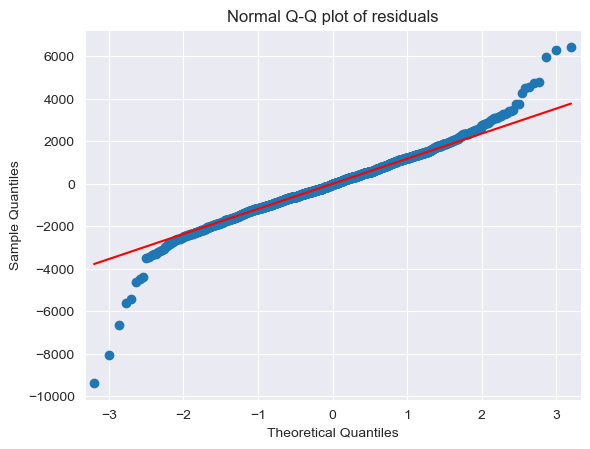

In [110]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [111]:
#The QQ plot is a valuable tool for assessing the normality of residuals in a model.
#A close alignment of points with the diagonal line suggests that the model's residuals are approximately normally distributed.
#Deviations from the diagonal line might indicate potential issues with the distribution of residuals, which could impact the reliability of statistical inference.


# Residual Plot for Homoscedasticity


In [112]:
def a( vals ):
    return (vals - vals.mean())/vals.std()


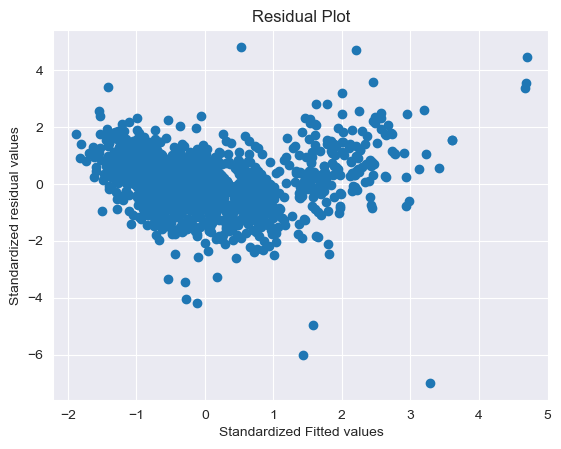

In [113]:
plt.scatter(a(model.fittedvalues),
           a(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


In [114]:
#The scatter plot of standardized residuals against standardized fitted values provides insights into the assumptions of homoscedasticity and the general relationship between residuals and predictions.
#A random scatter of points around the zero line suggests that the model's assumptions are met. Patterns or trends might indicate issues with the model's fit.
#Outliers in the plot could warrant further investigation, as they might influence the model's parameters and predictions.


eval_env: 1


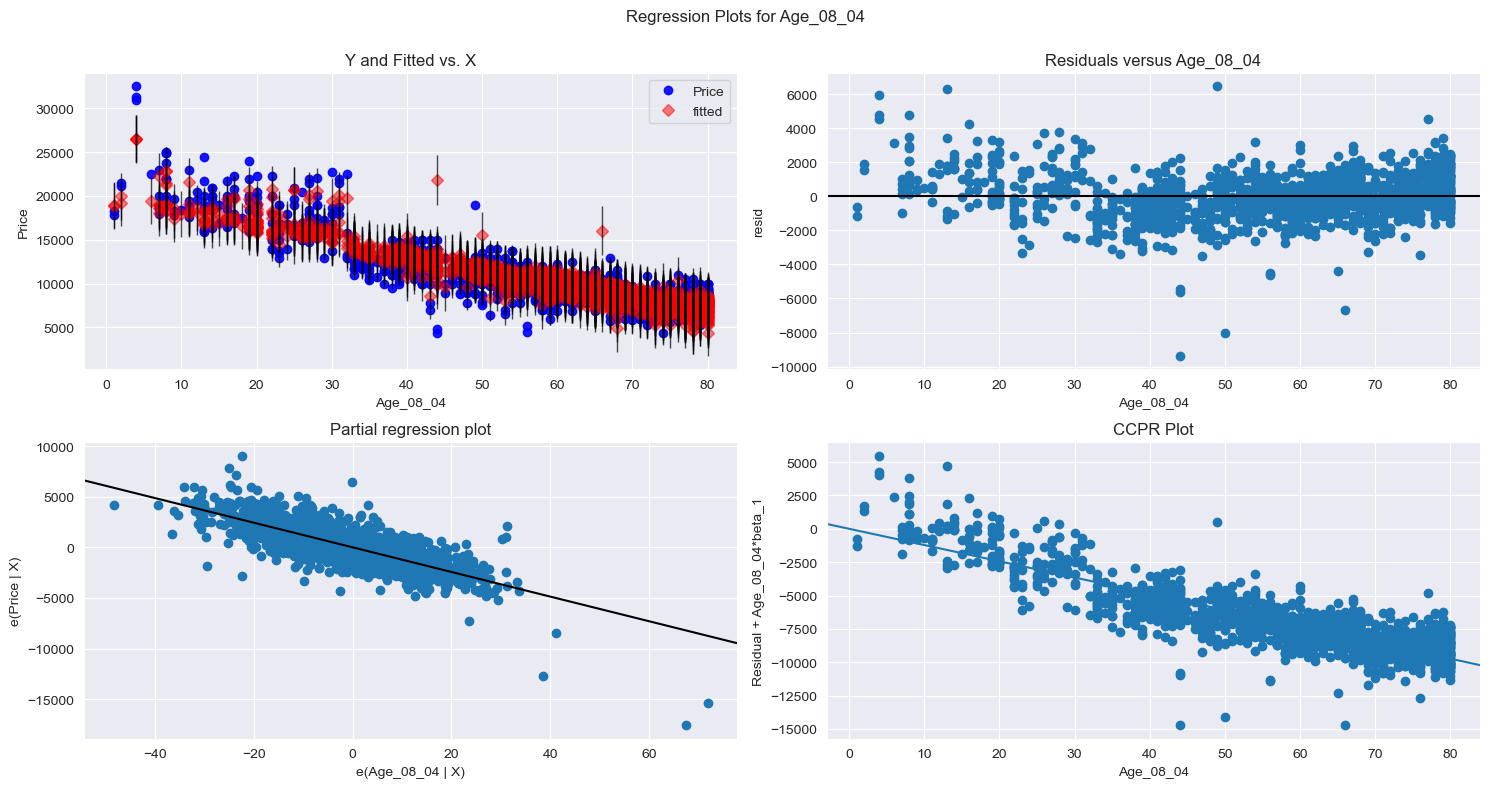

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()


In [116]:
#The diagnostic plots provide insights into the relationship between the "Age_08_04" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Age_08_04" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


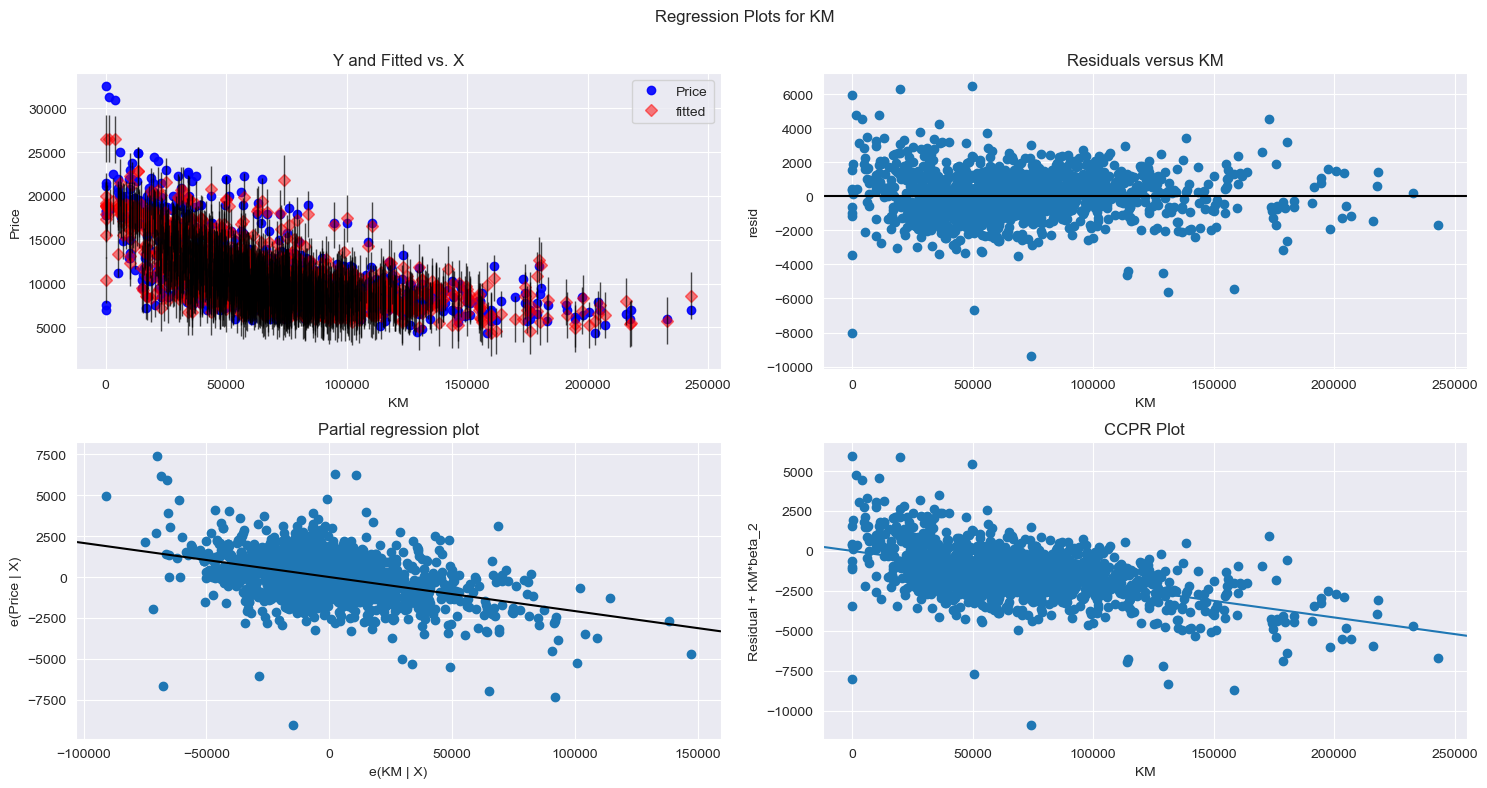

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()


In [118]:
#The diagnostic plots provide insights into the relationship between the "KM" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "KM" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


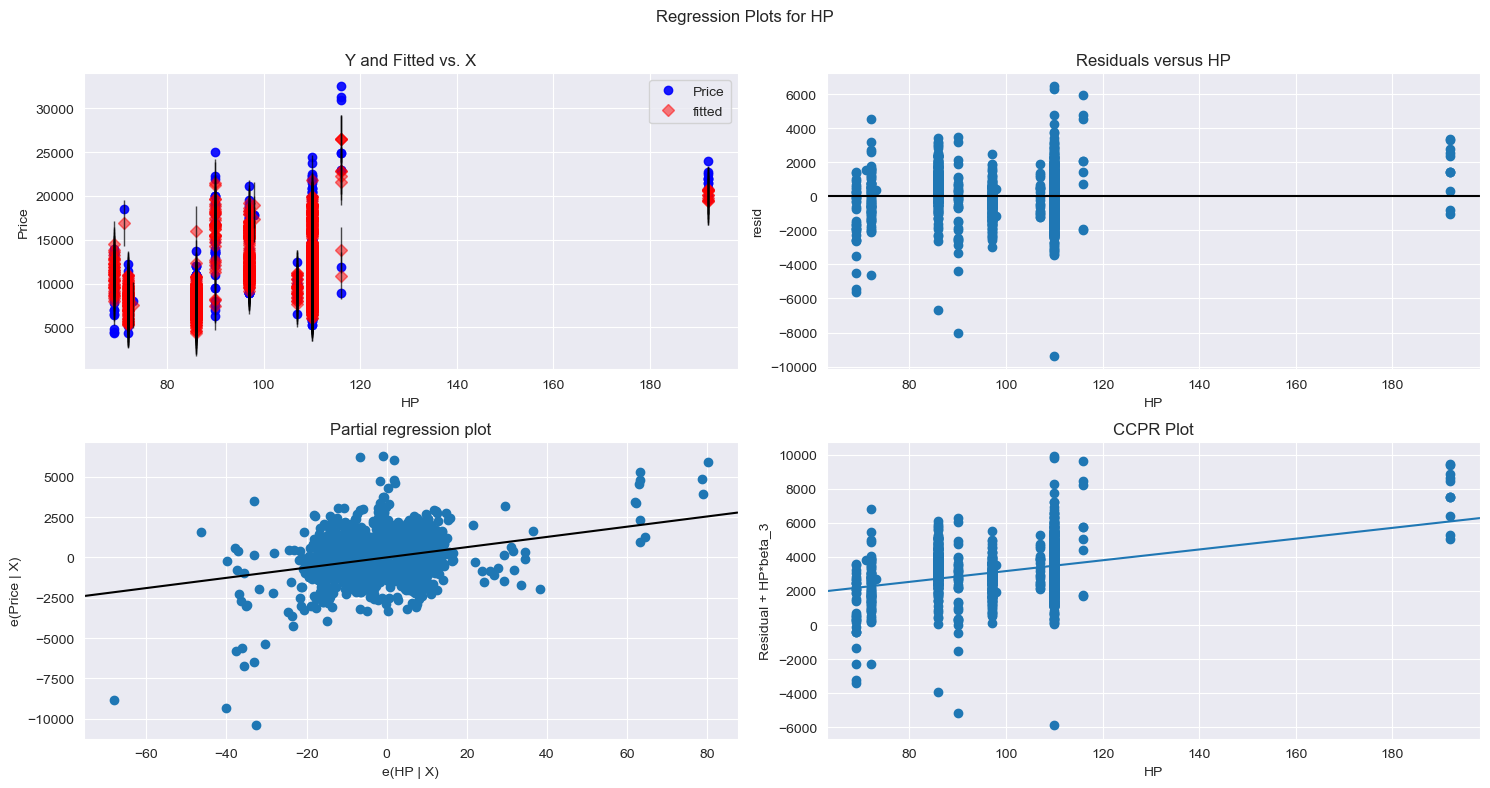

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()


In [120]:
#The diagnostic plots provide insights into the relationship between the "HP" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "HP" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


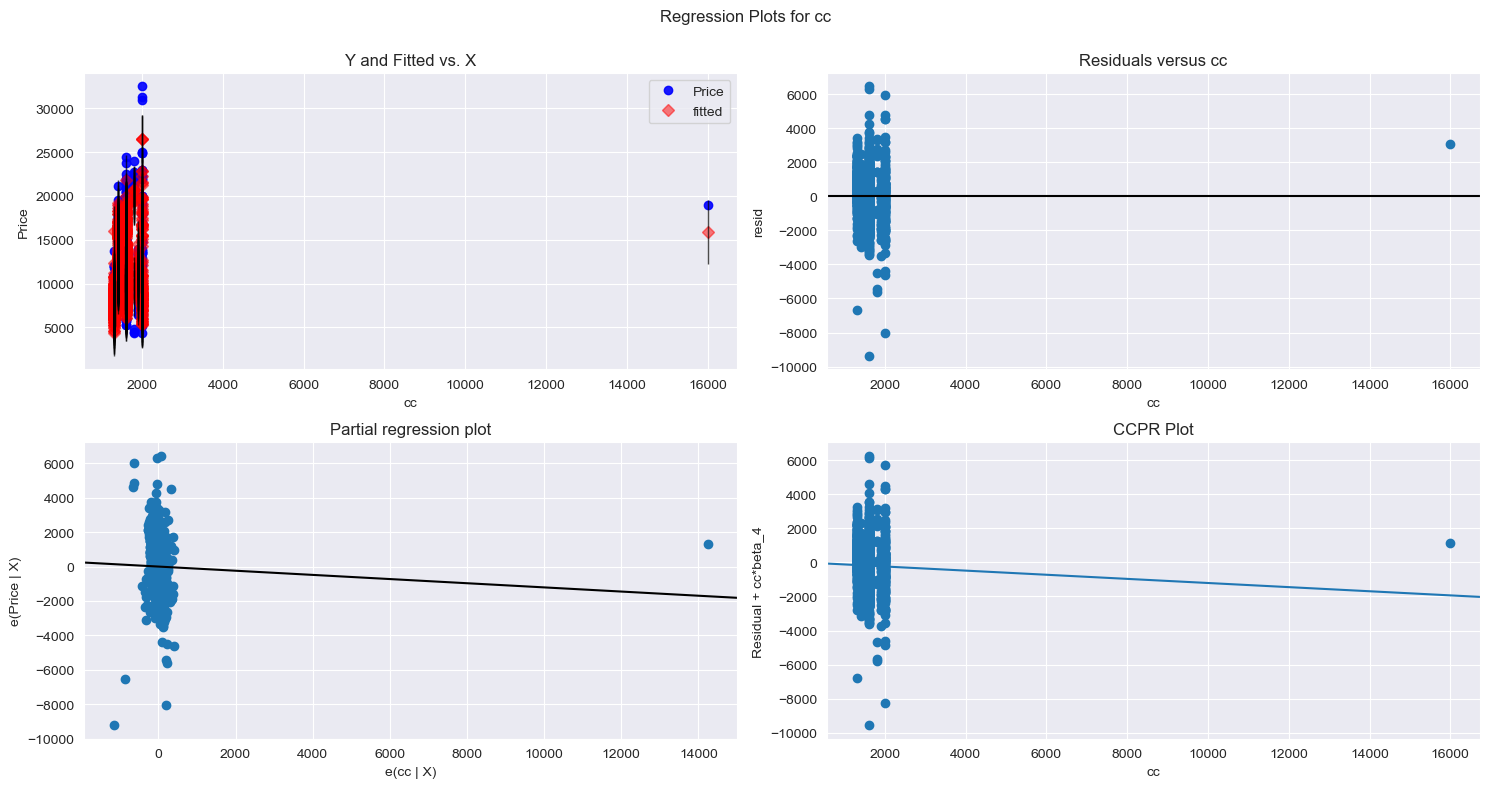

In [121]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()


In [122]:
#The diagnostic plots provide insights into the relationship between the "cc" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "cc" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


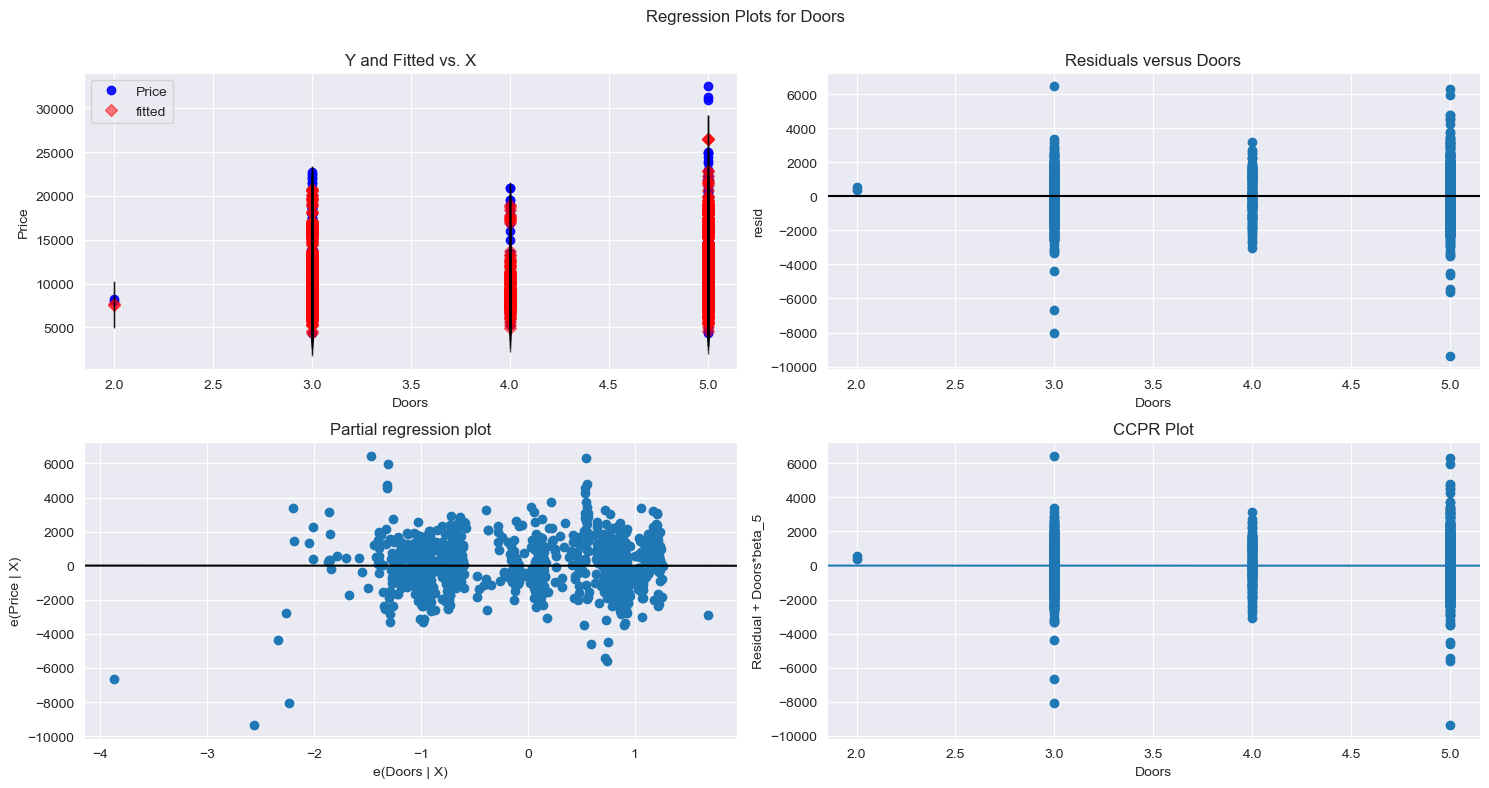

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()


In [124]:
#The diagnostic plots provide insights into the relationship between the "Doors" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Doors" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


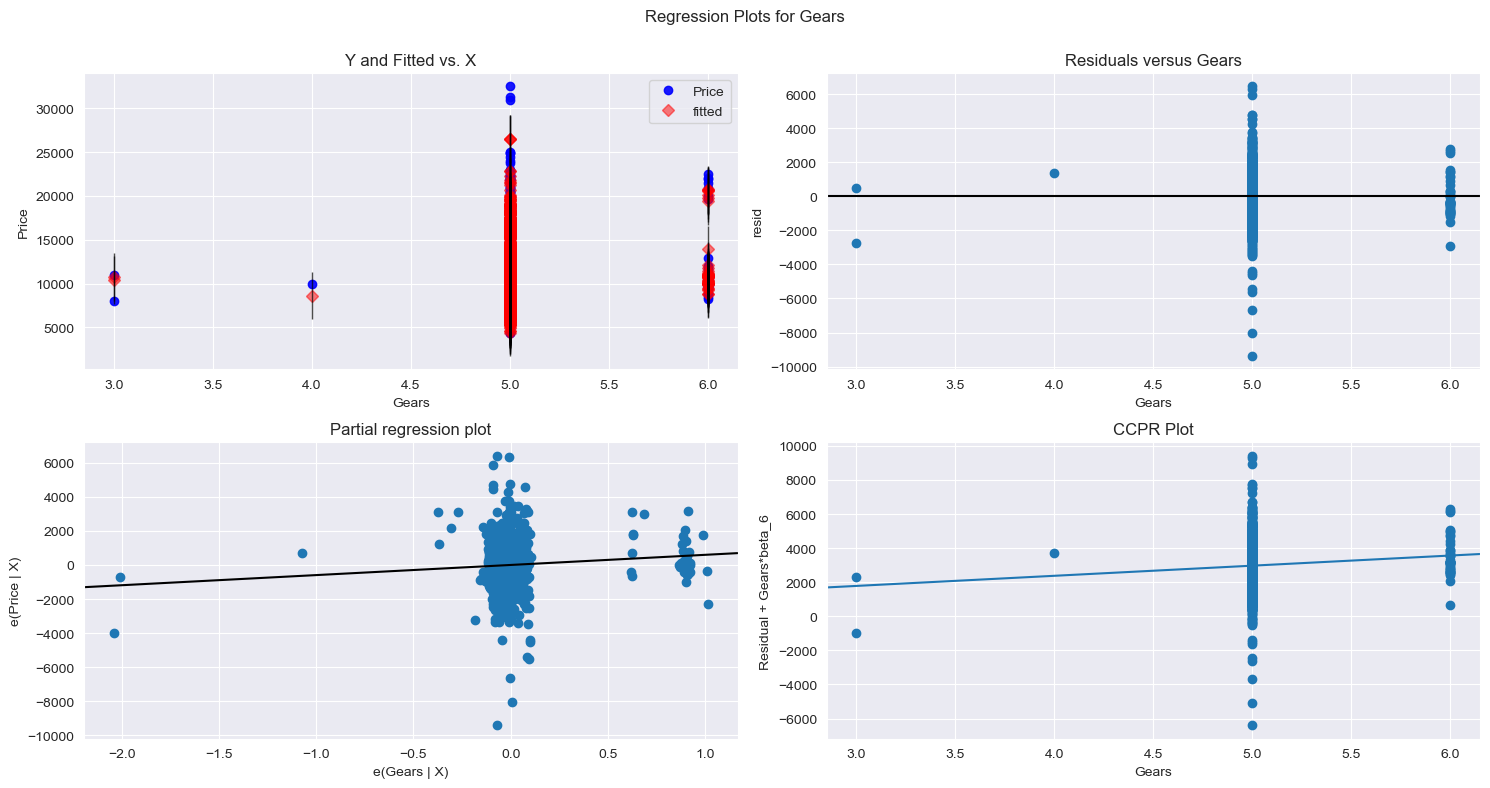

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()


In [126]:
#The diagnostic plots provide insights into the relationship between the "Gears" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Gears" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


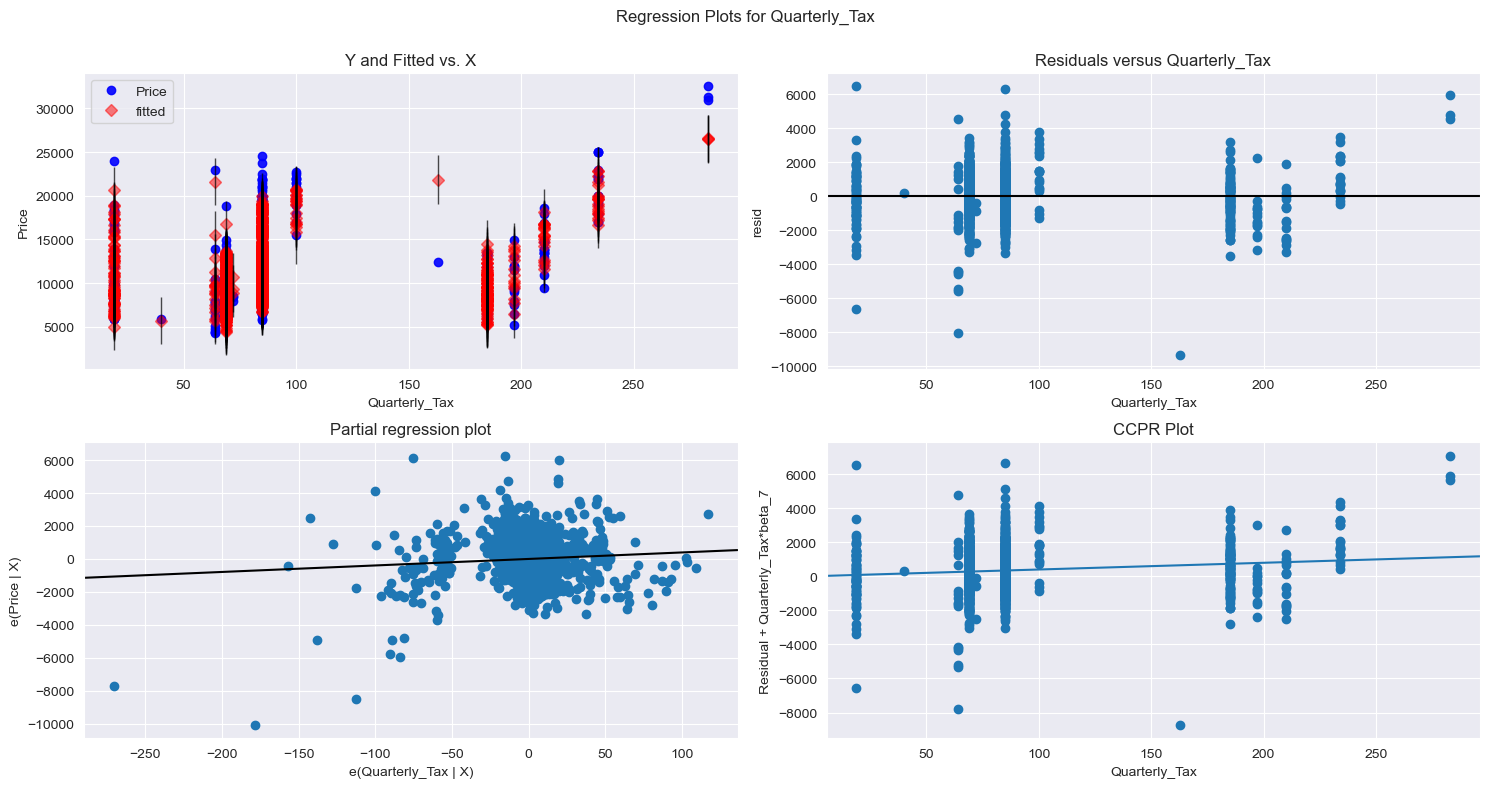

In [127]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()


In [128]:
#The diagnostic plots provide insights into the relationship between the "Quarterly_Tax" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Quarterly_Tax" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


eval_env: 1


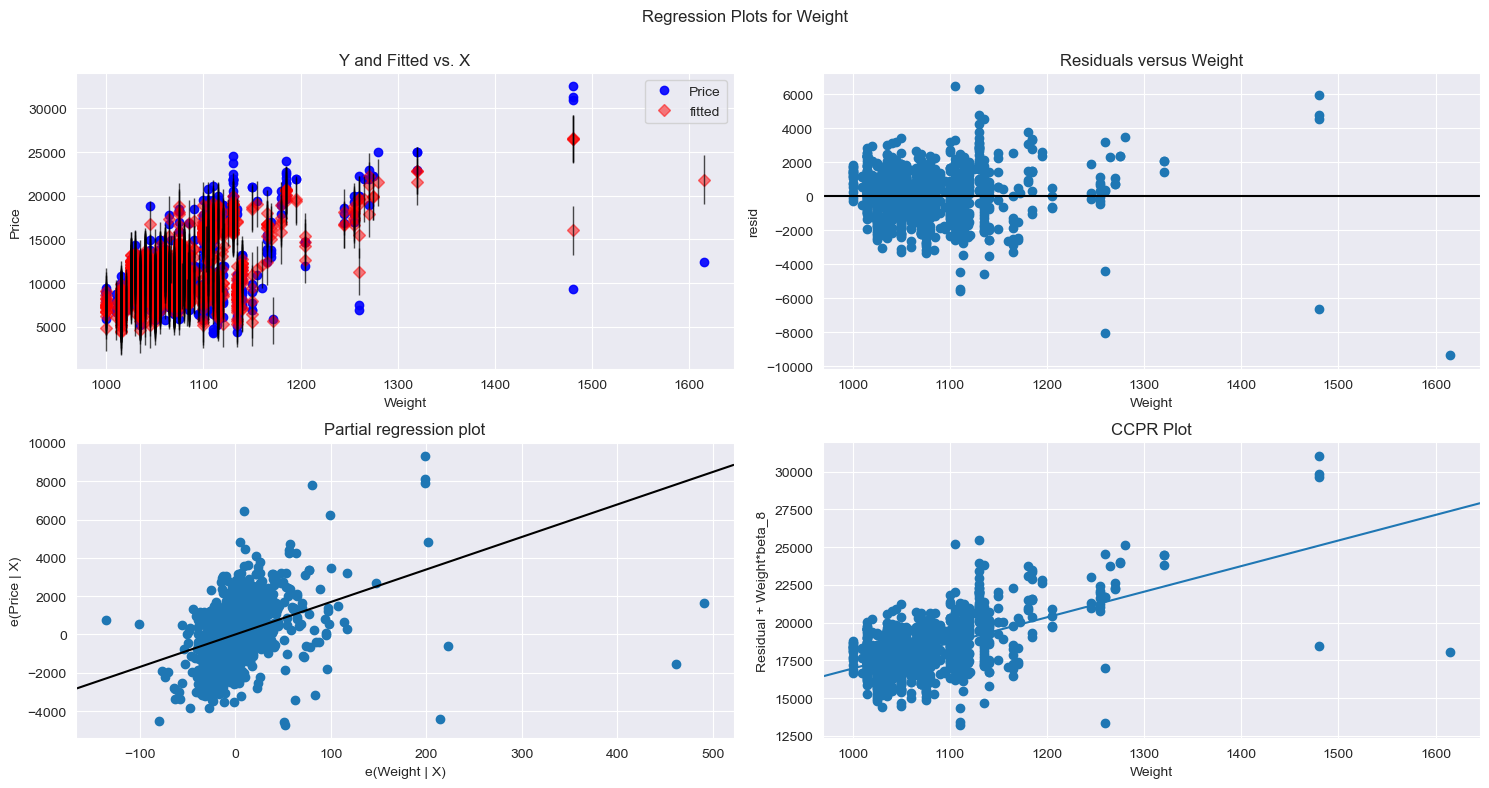

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()


In [130]:
#The diagnostic plots provide insights into the relationship between the "Weight" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Weight" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


# Model Deletion Diagnostics


# Detecting Influencers/Outliers


# Cook’s Distance


In [134]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


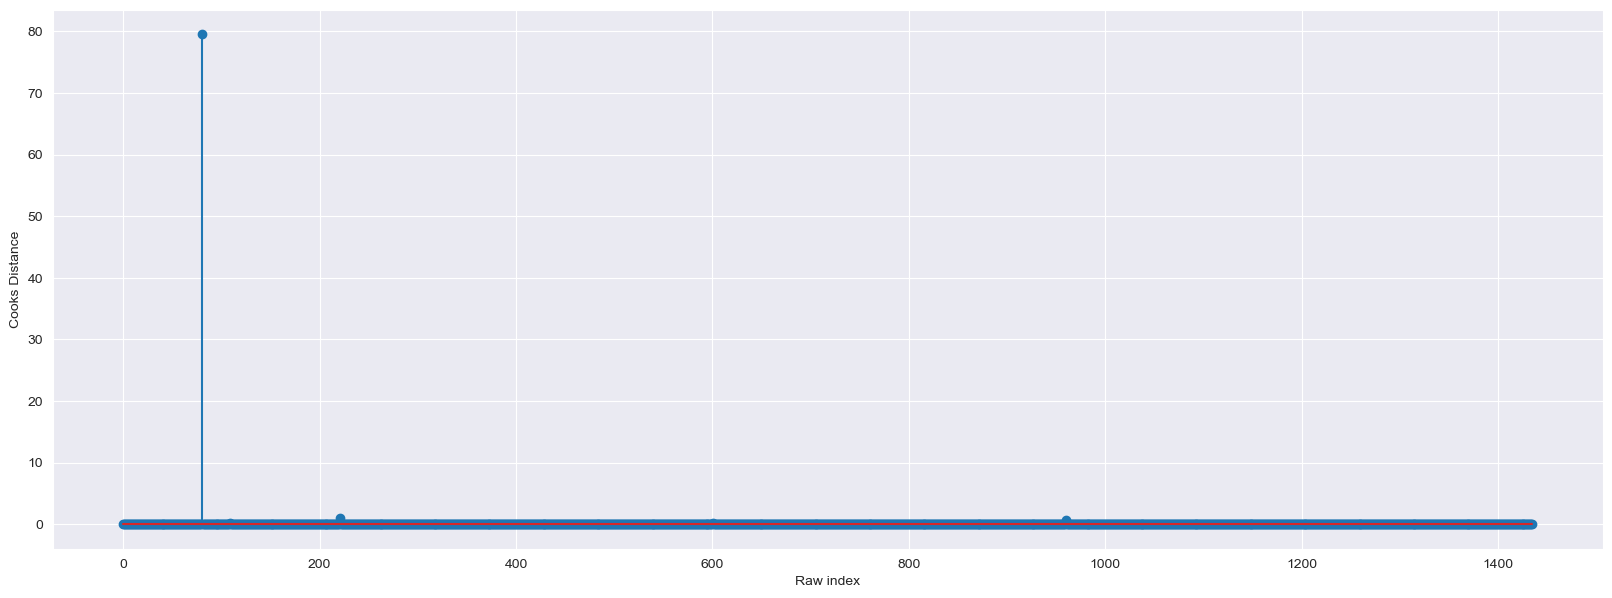

In [135]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [136]:
#The diagnostic plots provide insights into the relationship between the "Weight" predictor and the residuals, as well as the assumptions of linearity, constant variance, and independence.
#A random scatter of points around the zero line in the "Residuals vs Fitted" plot suggests that the model's assumptions are met for the "Weight" predictor.
#Patterns, nonlinearity, or outliers in the other plots may indicate issues that require further investigation and model refinement.


In [137]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138717)

# High Influence points


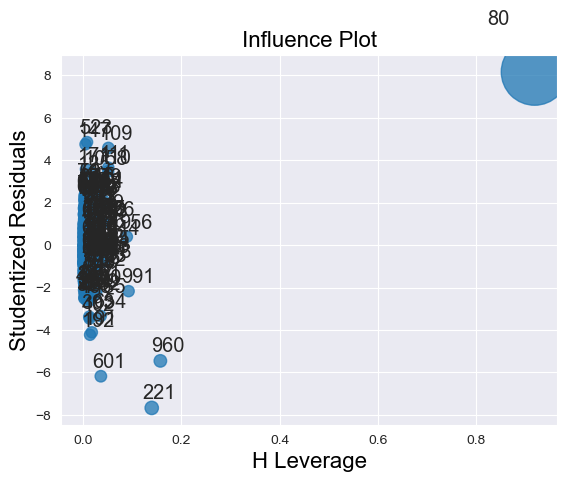

In [138]:
influence_plot(model)
plt.show()


In [139]:
#The influence plot provides a visual representation of influential observations and outliers based on their standardized residuals and leverage.
#Points that are both far from the threshold lines and have high leverage can have a significant impact on the model's parameters and predictions.
#These insights can guide decisions about whether to retain, modify, or exclude specific data points for improving the model's accuracy and generalization


In [140]:
# #  From the above plot, it is evident that data point 80 are the influencers


In [141]:
car[car.index.isin([80])]


Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
80  18950         25  20019  110  16000      5      5            100    1180

In [142]:
#See the differences in HP and other variable values
car.head(82)


Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
0   13500         23  46986   90   2000      3      5            210    1165
1   13750         23  72937   90   2000      3      5            210    1165
2   13950         24  41711   90   2000      3      5            210    1165
3   14950         26  48000   90   2000      3      5            210    1165
4   13750         30  38500   90   2000      3      5            210    1170
..    ...        ...    ...  ...    ...    ...    ...            ...     ...
77  18450         27  23489  110   1600      5      5             85    1115
78  16895         29  22575  110   1600      5      5             85    1115
79  14900         30  22000   97   1400      5      5             85    1110
80  18950         25  20019  110  16000      5      5            100    1180
81  17250         29  20000  110   1600      5      5             85    1115

[82 rows x 9 columns]

In [143]:
# Improving the model


In [144]:
car1=car.drop(car.index[[80]],axis=0).reset_index()
car1=car1.drop(['index'],axis=1)              #Drop the original index
car1.head(83)


Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0   13500         23  46986   90  2000      3      5            210    1165
1   13750         23  72937   90  2000      3      5            210    1165
2   13950         24  41711   90  2000      3      5            210    1165
3   14950         26  48000   90  2000      3      5            210    1165
4   13750         30  38500   90  2000      3      5            210    1170
..    ...        ...    ...  ...   ...    ...    ...            ...     ...
78  16895         29  22575  110  1600      5      5             85    1115
79  14900         30  22000   97  1400      5      5             85    1110
80  17250         29  20000  110  1600      5      5             85    1115
81  15450         25  17003   97  1400      5      5             85    1110
82  17950         31  16238  110  1600      5      5            100    1180

[83 rows x 9 columns]

In [145]:
model1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:10:05   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
model1_influence = model1.get_influence()
(c1, _) = model1_influence.cooks_distance


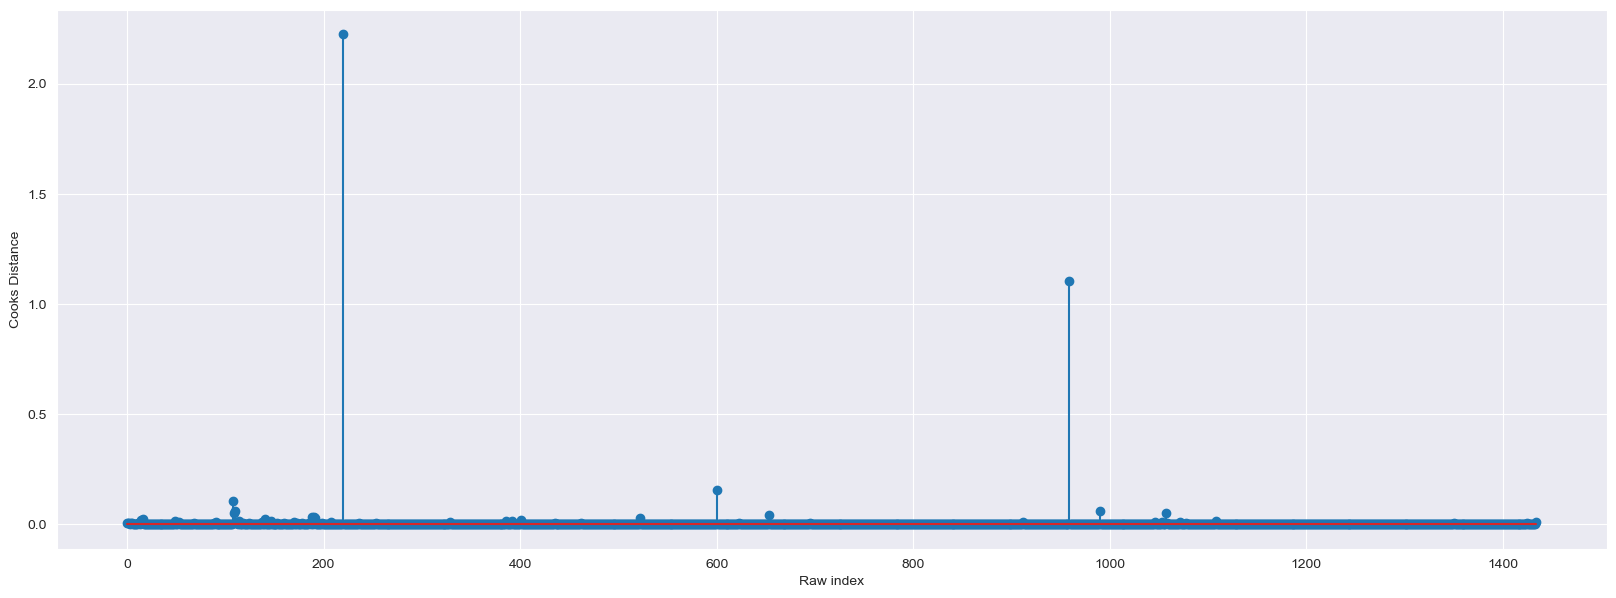

In [147]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car1)), np.round(c1, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [148]:
#The stem plot provides a visual representation of Cook's distances for the "car1" dataset, indicating influential observations.
#Points with large Cook's distances are worth examining more closely to understand their impact on the model.
#These insights can guide decisions about addressing influential observations to enhance the model's quality.


In [149]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))


(220, 2.2244611713001383)

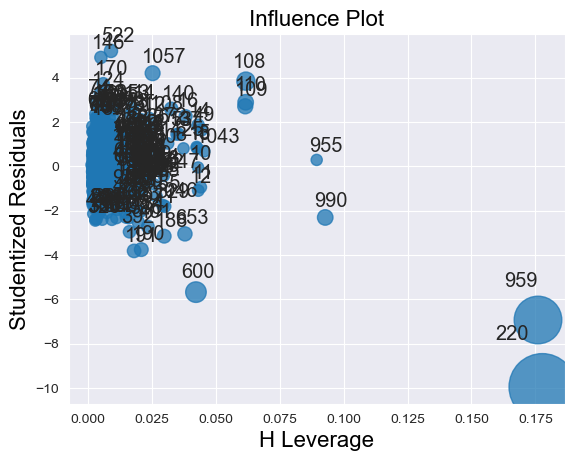

In [150]:
influence_plot(model1)
plt.show()


In [151]:
car1.head(962)


Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0    13500         23  46986   90  2000      3      5            210    1165
1    13750         23  72937   90  2000      3      5            210    1165
2    13950         24  41711   90  2000      3      5            210    1165
3    14950         26  48000   90  2000      3      5            210    1165
4    13750         30  38500   90  2000      3      5            210    1170
..     ...        ...    ...  ...   ...    ...    ...            ...     ...
957   8950         65  51000   86  1300      3      5             69    1015
958   8895         61  50925  110  1600      5      5             85    1070
959   9390         66  50806   86  1300      3      5             19    1480
960   8750         59  50469  110  1600      5      5             85    1070
961   9750         61  50173  110  1600      5      5             85    1075

[962 rows x 9 columns]

In [152]:
cars=car1.drop(car1.index[[220,959]],axis=0).reset_index()
cars=cars.drop(['index'],axis=1)              #Drop the original index
cars


Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1428   7500         69  20544   86  1300      3      5             69    1025
1429  10845         72  19000   86  1300      3      5             69    1015
1430   8500         71  17016   86  1300      3      5             69    1015
1431   7250         70  16916   86  1300      3      5             69    1015
1432   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

In [153]:
model2 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = cars).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:14:41   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

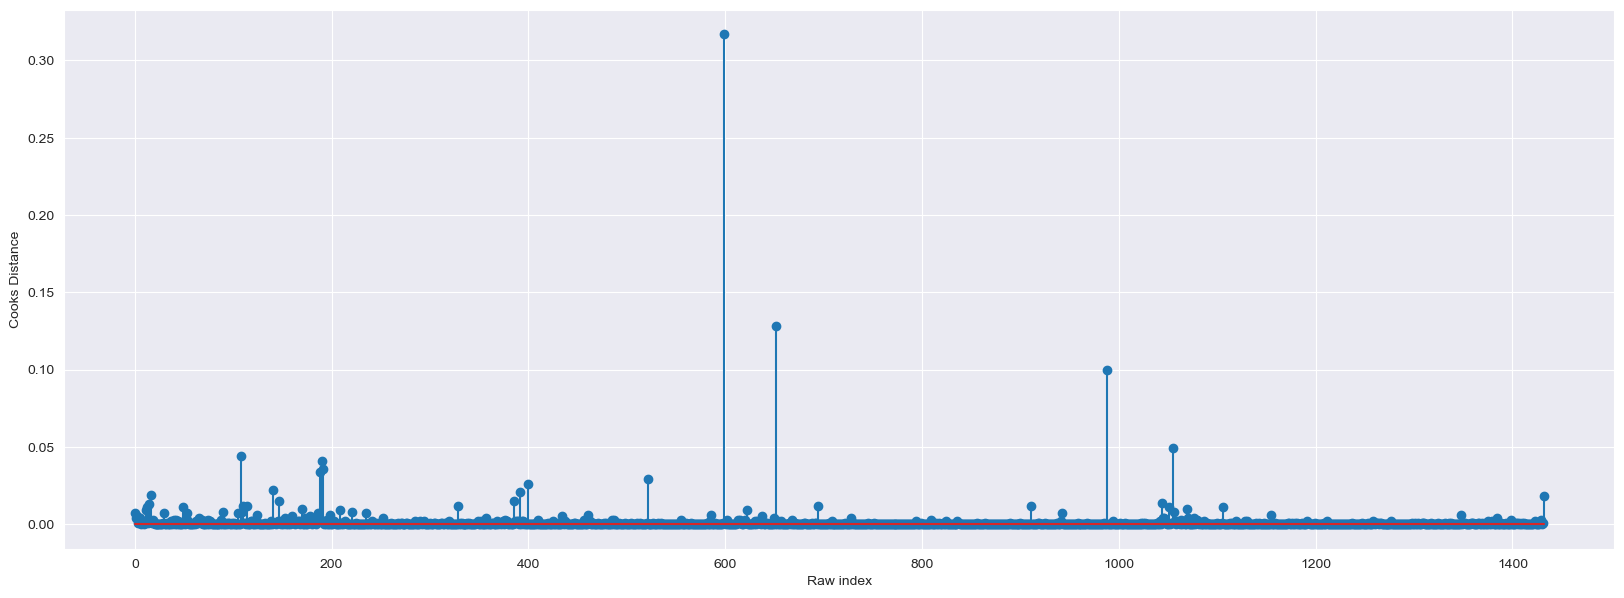

In [154]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c2, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [155]:
#The stem plot provides a visual representation of Cook's distances for the "cars" dataset based on model2, highlighting influential observations.
#Observations with high Cook's distances are candidates for further investigation to understand their impact on the model.
#Consider these insights in the context of your analysis goals and domain knowledge to make informed decisions about addressing influential observations.


In [156]:
#index and value of influencer where c is more than .5
(np.argmax(c2),np.max(c2))


(599, 0.31661315281441815)

In [158]:
# Since the value is <1 , we can stop the diagnostic process and finalize the model


In [159]:
#Check the accuracy of the mode
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = cars).fit()


In [160]:
(final_model.rsquared,final_model.aic)


(0.8851845904421738, 24469.715205158594)

# Predicting for new data


In [161]:
cars_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
final_model.predict(cars_new)


1    17947.972059
dtype: float64

In [162]:
final_model.predict()


array([16333.27381416, 15892.32685024, 16310.88608064, ...,
        8644.94730242,  8758.66446182, 10641.52100191])

In [163]:
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:18:56   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
final_model.params


Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64

# Actual Vs Predicted Graph


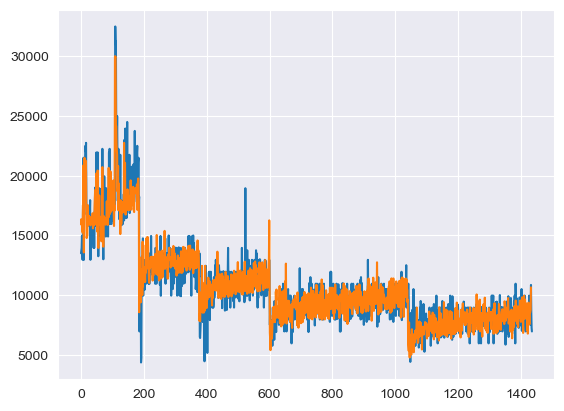

In [166]:
#Comparing original Data's Scatterlot with regressed model
plt.plot(car.Price)
plt.plot(final_model.predict(cars))      
plt.show()


In [167]:
#The comparison scatterplot helps you visually assess how well the regression model's predictions align with the actual "Price" data.
#The closer the points on the right-side scatterplot are to the points on the left-side scatterplot, the better the model's predictions match the actual data.
#Use this visualization to gain insights into the model's performance and its ability to capture the underlying relationships within the data.


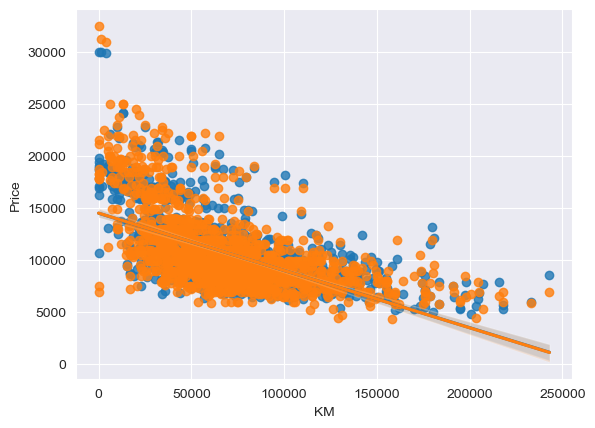

In [168]:
sns.regplot(x=cars.KM, y=final_model.predict(cars))
sns.regplot(x=car.KM, y=car.Price)
plt.show()


In [169]:
#The comparison scatterplot helps you visually assess how well the regression model's predictions align with the actual "Price" data.
#The closer the points on the right-side scatterplot are to the points on the left-side scatterplot, the better the model's predictions match the actual data.
#Use this visualization to gain insights into the model's performance and its ability to capture the underlying relationships within the data.


In [170]:
import pandas as pd
import plotly.express as px

# Load the dataset
toyota = pd.read_csv("ToyotaCorolla.csv", encoding='iso-8859-1')

# Create a scatter plot using Plotly
fig = px.scatter(toyota, x='Age_08_04', y='Price', title='Scatter Plot using Plotly')
fig.show()


In [171]:
#Age vs. Price Relationship:

#The scatter plot shows the relationship between the "Age_08_04" (age of the car in months) and "Price" (selling price) variables.
#As the age of the car increases, there is a general trend of decreasing prices. This is a common observation in the used car market where older cars tend to have lower prices.

#Spread of Data:

#The plot visually displays the spread of data points along the x-axis (age) and y-axis (price). There are variations in prices for cars of similar ages, indicating factors beyond age influencing the prices.

#Outliers and Patterns:

#Some outliers are visible in the plot where cars with specific ages have unusually high or low prices compared to the general trend.
#The plot helps identify potential patterns or clusters of data points, suggesting that there may be specific age ranges where prices are particularly high or low.


In [173]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
import pandas as pd

# Load the dataset
toyota = pd.read_csv("ToyotaCorolla.csv", encoding='iso-8859-1')

# Create a ColumnDataSource from the dataframe
source = ColumnDataSource(toyota)

# Create an interactive scatter plot using Bokeh
p = figure(title='Interactive Scatter Plot using Bokeh', x_axis_label='Age', y_axis_label='Price')
p.scatter('Age_08_04', 'Price', source=source, size=8, color='blue', legend_label='Car Data')

show(p)


In [174]:
#Both scatter plots visualize the relationship between car age and price.
#Plotly offers a static plot, while Bokeh provides an interactive experience for exploring the data more deeply.
#In both plots, you can observe trends, spread, outliers, and potential patterns in the relationship between car age and price.
